# Global Climate Change

### Author : Lazarus
### KU ID: 3028051

## Anomaly Detection
- In data analysis, anomaly detection (also outlier detection) is the identification of rare items, events or observations which raise suspicions by differing significantly from the majority of the data.


# Step 1: Set up the environment:
- Import all Libraries required

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import seaborn as sns

- import data to into Pandas data frame

In [21]:
history= pd.read_csv("https://raw.githubusercontent.com/Manudeep-git/731_Final_Project/main/Contries_Data/Usa_history_data.csv")

history.tail(5)

Name   Date time  Maximum Temperature  Minimum Temperature  \
18540  United States  10/28/2020                 69.7                 61.6   
18541  United States  10/29/2020                 63.5                 52.9   
18542  United States  10/30/2020                 53.8                 48.6   
18543  United States  10/31/2020                 49.6                 40.5   
18544  United States  11/01/2020                 58.6                 41.9   

       Temperature  Wind Chill  Heat Index  Precipitation  Snow Depth  \
18540         65.3         NaN         NaN           0.00         NaN   
18541         58.3         NaN         NaN           2.25         NaN   
18542         50.9        43.5         NaN           0.31         NaN   
18543         46.6        37.0         NaN           0.00         NaN   
18544         51.5        33.5         NaN           0.51         NaN   

       Wind Speed  Wind Gust  Visibility  Cloud Cover  Relative Humidity  \
18540        11.9       13.9         8.6         42.1              87.16   
18541        16.4       25.3         6.4         57.1              91.80   
18542        20.5       28.9         9.7         89.3              76.92   
18543        14.3        NaN         9.9         86.7              69.44   
18544        26.1       38.5         9.3         87.1              73.21   

                   Conditions  
18540        Partially cloudy  
18541  Rain, Partially cloudy  
18542          Rain, Overcast  
18543                Overcast  
18544          Rain, Overcast

- Let us change column names according to our conveniance and also change time feature to 
`datetime` type


## Step2: Feature Engineering and Exploratoy Data Analysis

In [22]:
history.rename(columns = {'Date time':'time','Maximum Temperature':'maxTemp','Minimum Temperature':'minTemp',
                         'Temperature':'temp','Wind Chill':'windChill','Heat Index':'heatIndex',
                          'Snow Depth':'snowDepth','Wind Speed':'windSpeed','Wind Gust':'windGust',
                          'Cloud Cover':'cloudCover','Relative Humidity':'relHumidity'
                         }, inplace=True)
history["time"]=pd.to_datetime(history.time)
history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18545 entries, 0 to 18544
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Name           18545 non-null  object        
 1   time           18545 non-null  datetime64[ns]
 2   maxTemp        18545 non-null  float64       
 3   minTemp        18545 non-null  float64       
 4   temp           18545 non-null  float64       
 5   windChill      8761 non-null   float64       
 6   heatIndex      5306 non-null   float64       
 7   Precipitation  18545 non-null  float64       
 8   snowDepth      1892 non-null   float64       
 9   windSpeed      18545 non-null  float64       
 10  windGust       2523 non-null   float64       
 11  Visibility     18545 non-null  float64       
 12  cloudCover     18545 non-null  float64       
 13  relHumidity    18545 non-null  float64       
 14  Conditions     18545 non-null  object        
dtypes: datetime64[ns](1

### Here we have a lot of information about this USA data lets also import data of other countries and repeat same operations  

In [23]:
russia= pd.read_csv("https://raw.githubusercontent.com/SFLazarus/731_Final_Project/main/Contries_Data/Russia_history_data.csv")
russia.rename(columns = {'Date time':'time','Maximum Temperature':'maxTemp','Minimum Temperature':'minTemp',
                         'Temperature':'temp','Wind Chill':'windChill','Heat Index':'heatIndex',
                          'Snow Depth':'snowDepth','Wind Speed':'windSpeed','Wind Gust':'windGust',
                          'Cloud Cover':'cloudCover','Relative Humidity':'relHumidity'
                         }, inplace=True)
russia["time"]=pd.to_datetime(russia.time)
russia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18019 entries, 0 to 18018
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Name           18019 non-null  object        
 1   time           18019 non-null  datetime64[ns]
 2   maxTemp        18019 non-null  float64       
 3   minTemp        18019 non-null  float64       
 4   temp           18019 non-null  float64       
 5   windChill      13062 non-null  float64       
 6   heatIndex      878 non-null    float64       
 7   Precipitation  18019 non-null  float64       
 8   snowDepth      5350 non-null   float64       
 9   windSpeed      18019 non-null  float64       
 10  windGust       833 non-null    float64       
 11  Visibility     17985 non-null  float64       
 12  cloudCover     18017 non-null  float64       
 13  relHumidity    18019 non-null  float64       
 14  Conditions     18019 non-null  object        
dtypes: datetime64[ns](1

In [24]:
uk=pd.read_csv("https://raw.githubusercontent.com/Manudeep-git/731_Final_Project/main/Contries_Data/UK_history_data.csv")
uk.rename(columns = {'Date time':'time','Maximum Temperature':'maxTemp','Minimum Temperature':'minTemp',
                         'Temperature':'temp','Wind Chill':'windChill','Heat Index':'heatIndex',
                          'Snow Depth':'snowDepth','Wind Speed':'windSpeed','Wind Gust':'windGust',
                          'Cloud Cover':'cloudCover','Relative Humidity':'relHumidity'
                         }, inplace=True)
uk["time"]=pd.to_datetime(uk.time)
uk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17472 entries, 0 to 17471
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Name           17472 non-null  object        
 1   time           17472 non-null  datetime64[ns]
 2   maxTemp        17472 non-null  float64       
 3   minTemp        17472 non-null  float64       
 4   temp           17472 non-null  float64       
 5   windChill      9222 non-null   float64       
 6   heatIndex      545 non-null    float64       
 7   Precipitation  17472 non-null  float64       
 8   snowDepth      810 non-null    float64       
 9   windSpeed      17472 non-null  float64       
 10  windGust       1254 non-null   float64       
 11  Visibility     17472 non-null  float64       
 12  cloudCover     17471 non-null  float64       
 13  relHumidity    17472 non-null  float64       
 14  Conditions     17472 non-null  object        
dtypes: datetime64[ns](1

In [25]:
australia=pd.read_csv("https://raw.githubusercontent.com/Manudeep-git/731_Final_Project/main/Contries_Data/Australia_history_data.csv")
australia.rename(columns = {'Date time':'time','Maximum Temperature':'maxTemp','Minimum Temperature':'minTemp',
                         'Temperature':'temp','Wind Chill':'windChill','Heat Index':'heatIndex',
                          'Snow Depth':'snowDepth','Wind Speed':'windSpeed','Wind Gust':'windGust',
                          'Cloud Cover':'cloudCover','Relative Humidity':'relHumidity'
                         }, inplace=True)
australia["time"]=pd.to_datetime(australia.time)
australia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18570 entries, 0 to 18569
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Name           18570 non-null  object        
 1   time           18570 non-null  datetime64[ns]
 2   maxTemp        18570 non-null  float64       
 3   minTemp        18570 non-null  float64       
 4   temp           18570 non-null  float64       
 5   windChill      8512 non-null   float64       
 6   heatIndex      3031 non-null   float64       
 7   Precipitation  18570 non-null  float64       
 8   snowDepth      31 non-null     float64       
 9   windSpeed      18570 non-null  float64       
 10  windGust       169 non-null    float64       
 11  Visibility     17463 non-null  float64       
 12  cloudCover     18570 non-null  float64       
 13  relHumidity    18570 non-null  float64       
 14  Conditions     18570 non-null  object        
dtypes: datetime64[ns](1

### Now we are ready with four countries data in our data frames.

In [26]:
history.shape

(18545, 15)

In [27]:
russia.shape

(18019, 15)

In [28]:
uk.shape

(17472, 15)

In [29]:
australia.shape

(18570, 15)

In [30]:
print("::::::::before:::::::::::")
print(history.isnull().sum())

::::::::before:::::::::::
Name                 0
time                 0
maxTemp              0
minTemp              0
temp                 0
windChill         9784
heatIndex        13239
Precipitation        0
snowDepth        16653
windSpeed            0
windGust         16022
Visibility           0
cloudCover           0
relHumidity          0
Conditions           0
dtype: int64


In [31]:
print("::::::::before:::::::::::")
print(russia.isnull().sum())

::::::::before:::::::::::
Name                 0
time                 0
maxTemp              0
minTemp              0
temp                 0
windChill         4957
heatIndex        17141
Precipitation        0
snowDepth        12669
windSpeed            0
windGust         17186
Visibility          34
cloudCover           2
relHumidity          0
Conditions           0
dtype: int64


In [32]:
print("::::::::before:::::::::::")
print(uk.isnull().sum())

::::::::before:::::::::::
Name                 0
time                 0
maxTemp              0
minTemp              0
temp                 0
windChill         8250
heatIndex        16927
Precipitation        0
snowDepth        16662
windSpeed            0
windGust         16218
Visibility           0
cloudCover           1
relHumidity          0
Conditions           0
dtype: int64


In [33]:
print("::::::::before:::::::::::")
print(australia.isnull().sum())

::::::::before:::::::::::
Name                 0
time                 0
maxTemp              0
minTemp              0
temp                 0
windChill        10058
heatIndex        15539
Precipitation        0
snowDepth        18539
windSpeed            0
windGust         18401
Visibility        1107
cloudCover           0
relHumidity          0
Conditions           0
dtype: int64


## Step 3: Anomaly detection Model

#### As we have lot of attributes to operate on, let us write a function for detecting anomalies and plotting for visualization

## Isolation Forest Model

In [34]:
def isoForest(data=history, contamination=0.005, attribute='maxTemp',timeattribute='time', name='Maximum Temperature'):
   
    X = data[[attribute]]
    clf = IsolationForest(contamination=contamination,random_state=2).fit(X)
    
    fig, ax = plt.subplots (figsize=(15, 7))
    a = data.loc[clf.predict(X) == -1, [timeattribute, attribute]]
    ax.plot (data[timeattribute], list(data[attribute]), alpha=0.6)
    ax.scatter (a[timeattribute], list (a[attribute]), color = 'red', lw = 1)

    plt.title ('Isolation Forest for Anomaly Detection', fontweight = 'bold', size=25)
    plt.ylabel (name, fontweight = 'bold', size=15)
    plt.xlabel (timeattribute, fontweight = 'bold',size=15)
    plt.legend([name,'anomalies'],loc='best', prop={'size': 15})
    plt.show ()

## Local Outlier Factor Model

In [35]:
def lof_model(data=history, contamination=0.005, attribute='maxTemp',timeattribute='time', name='Maximum Temperature'):
   
    X = data[[attribute]]
    clf = LocalOutlierFactor(contamination=contamination)
    
    fig, ax = plt.subplots (figsize=(15, 7))
    a = data.loc[clf.fit_predict(X) == -1, [timeattribute, attribute]]
    ax.plot (data[timeattribute], list(data[attribute]),alpha=0.6)
    ax.scatter (a[timeattribute], list (a[attribute]), color = 'red', lw = 1)

    plt.title ('Local Outlier Factor for Anomaly Detection', fontweight = 'bold', size=25)
    plt.ylabel (name, fontweight = 'bold', size=15)
    plt.xlabel (timeattribute, fontweight = 'bold',size=15)
    plt.legend([name,'anomalies'],loc='best', prop={'size': 15})
    plt.show ()

## Step 4:Detecting anomalies

### First, lets start with maximum temperature for all four countries:

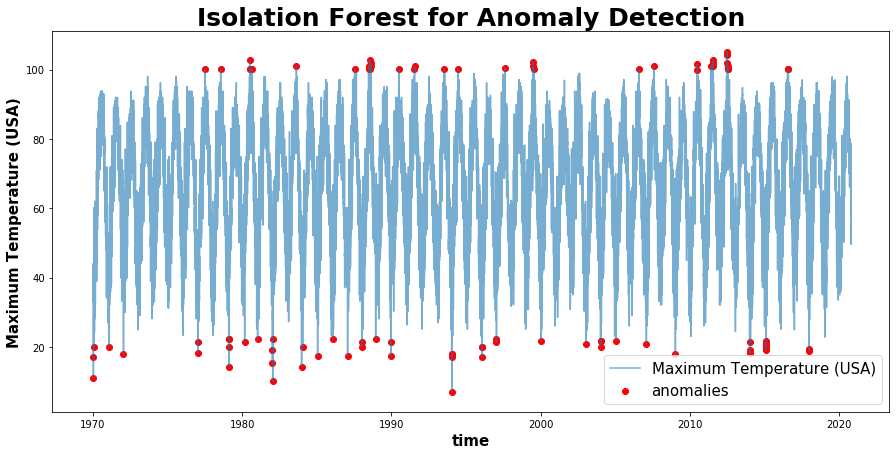

In [36]:
isoForest(name='Maximum Temperature (USA)')

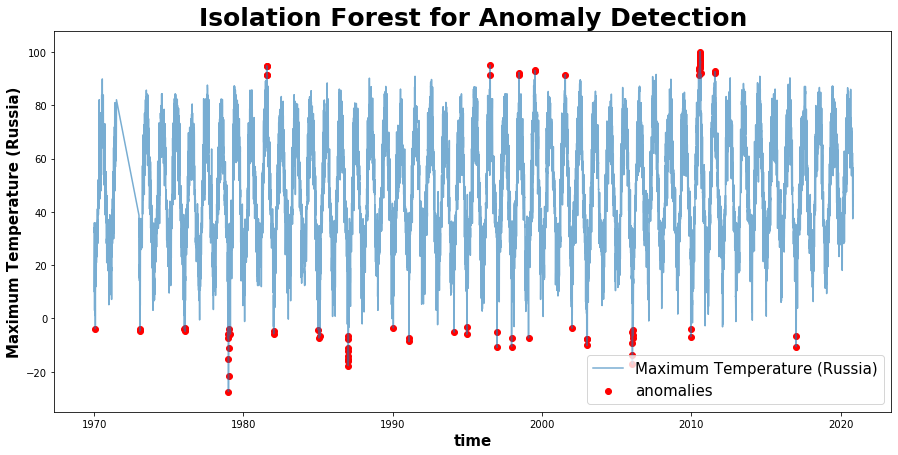

In [37]:
isoForest(data=russia, name='Maximum Temperature (Russia)')

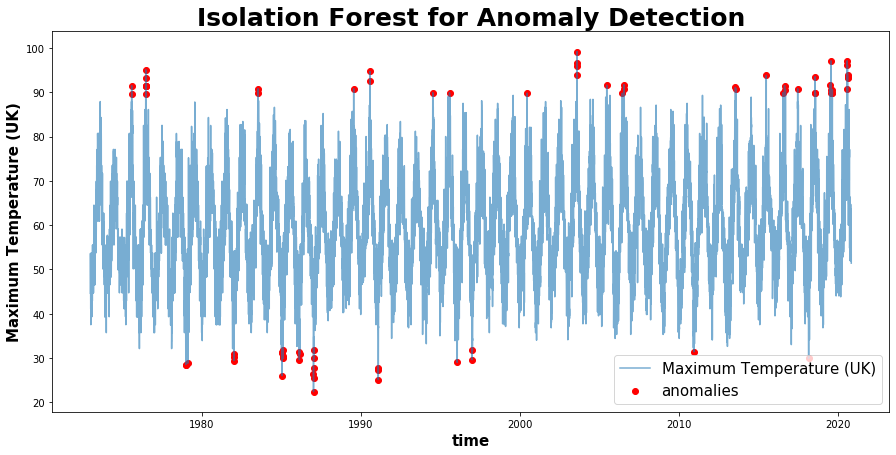

In [38]:
isoForest(data=uk, name='Maximum Temperature (UK)')

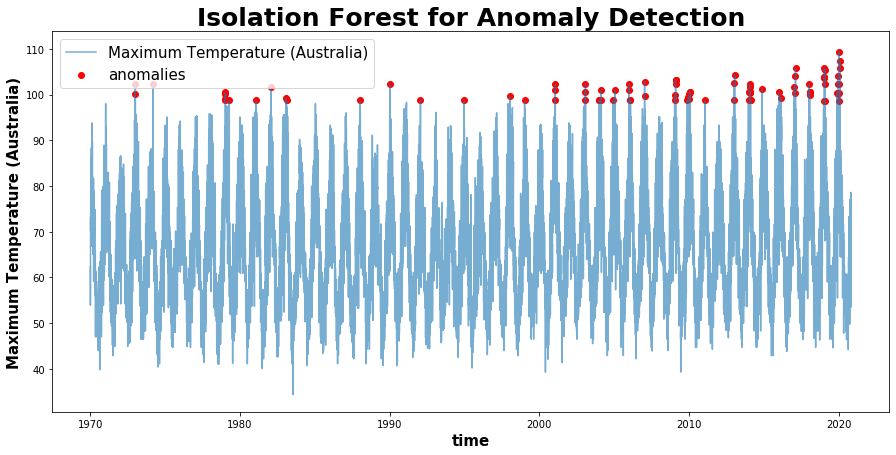

In [39]:
isoForest(data=australia, name='Maximum Temperature (Australia)')

### Now, Let us try with Local outlier Factor model

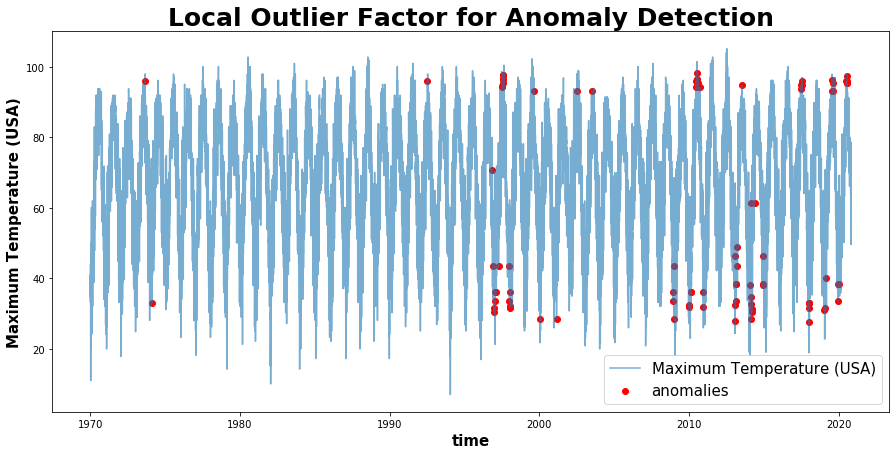

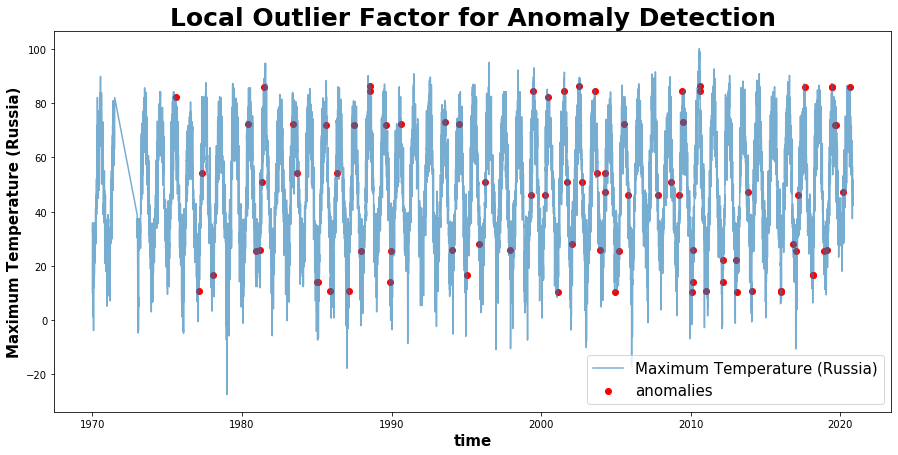

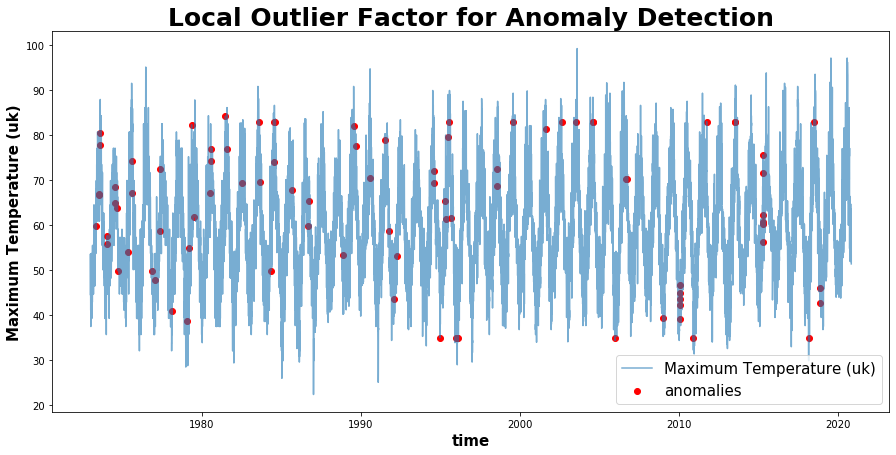

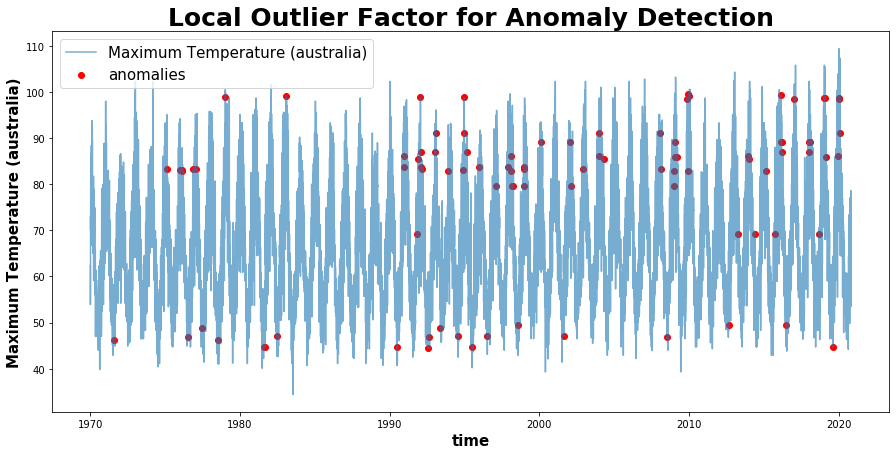

In [40]:
lof_model(name='Maximum Temperature (USA)')
lof_model(data=russia,name='Maximum Temperature (Russia)')
lof_model(data=uk,name='Maximum Temperature (uk)')
lof_model(data=australia,name='Maximum Temperature (australia)')


### Now let us check for minimum temperature

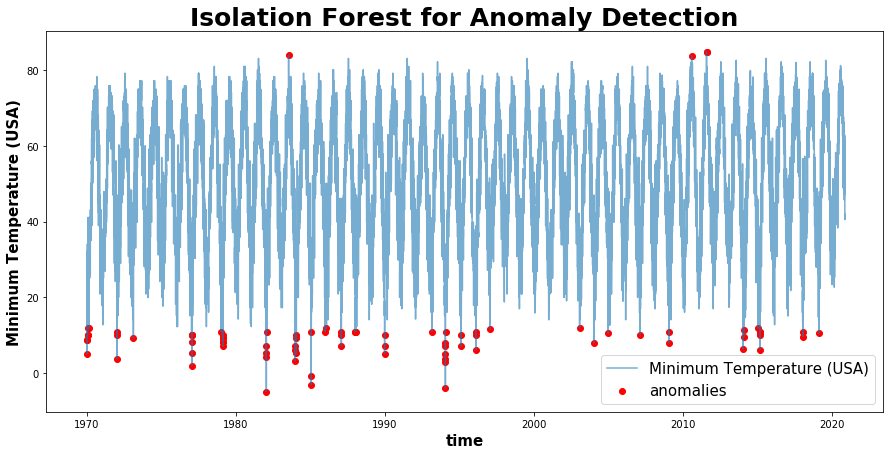

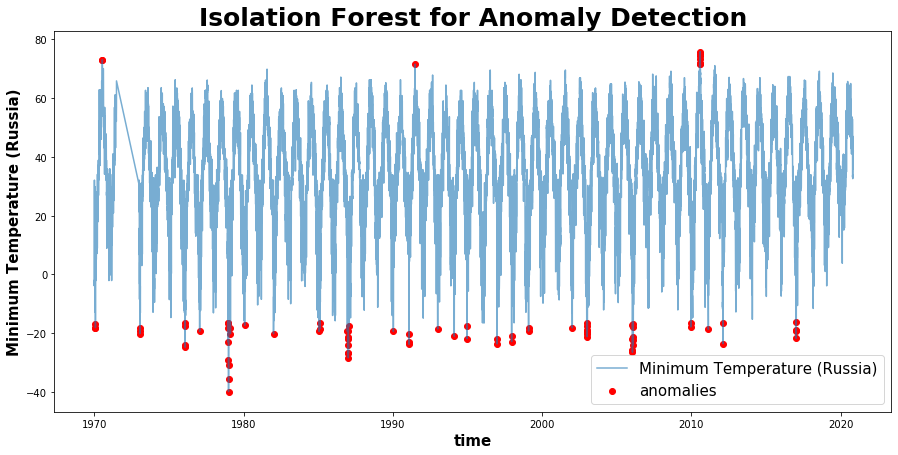

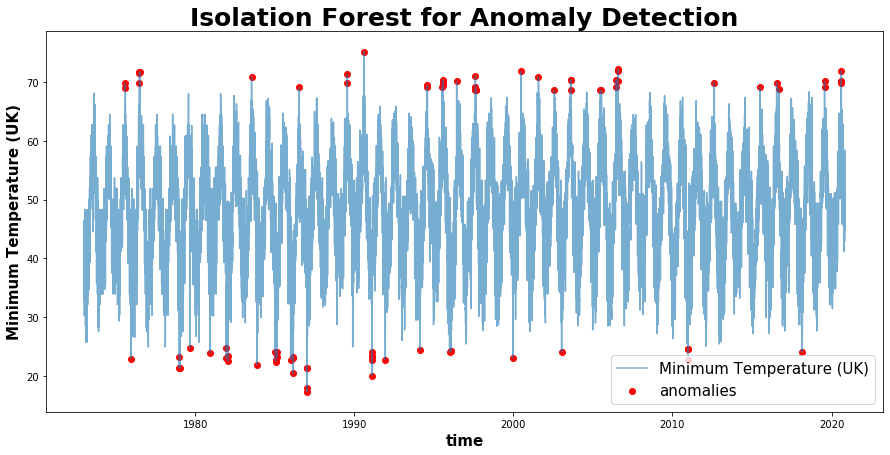

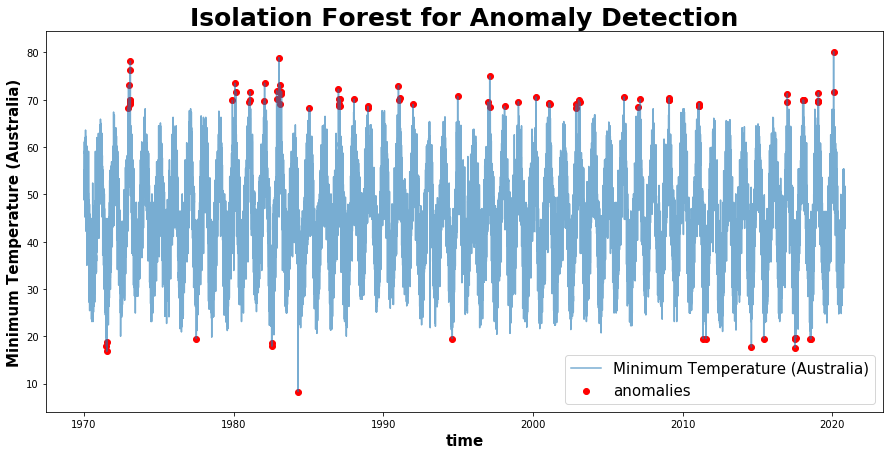

In [41]:
isoForest(data=history,attribute='minTemp', name='Minimum Temperature (USA)')
isoForest(data=russia,attribute='minTemp', name='Minimum Temperature (Russia)')
isoForest(data=uk,attribute='minTemp', name='Minimum Temperature (UK)')
isoForest(data=australia,attribute='minTemp', name='Minimum Temperature (Australia)')

### Let's try the same with the Local Outlier Factor

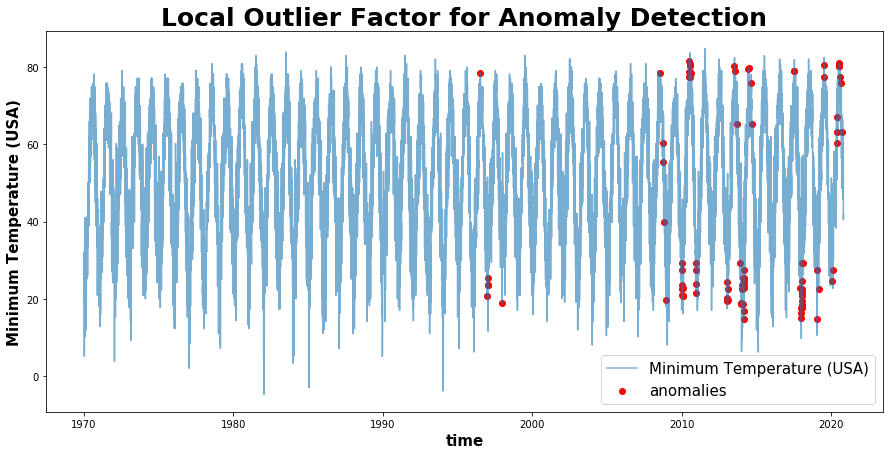

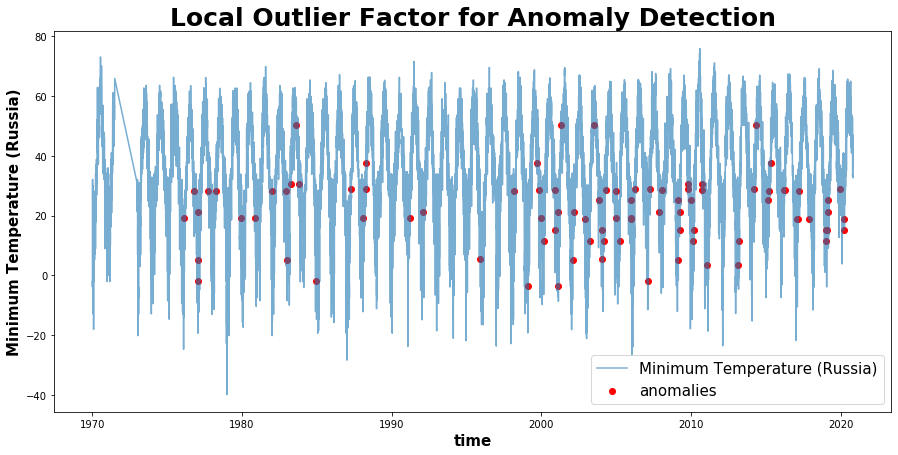

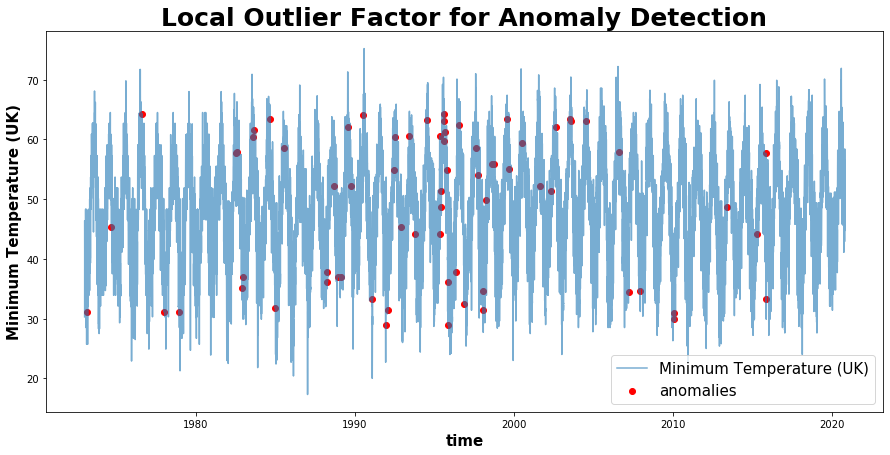

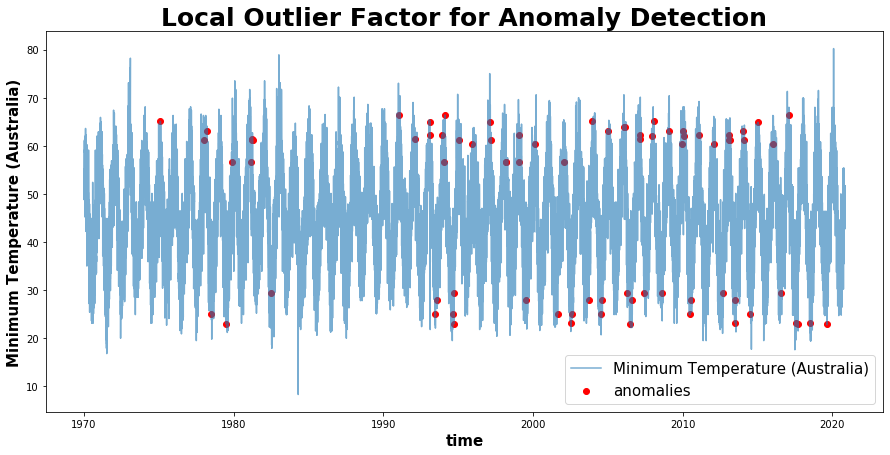

In [42]:
lof_model(data=history,attribute='minTemp',name='Minimum Temperature (USA)')
lof_model(data=russia,attribute='minTemp',name='Minimum Temperature (Russia)')
lof_model(data=uk,attribute='minTemp',name='Minimum Temperature (UK)')
lof_model(data=australia,attribute='minTemp',name='Minimum Temperature (Australia)')

### Now Let us try to detect anomalies for Temperature feature from all 4 countries using Isolation Forest

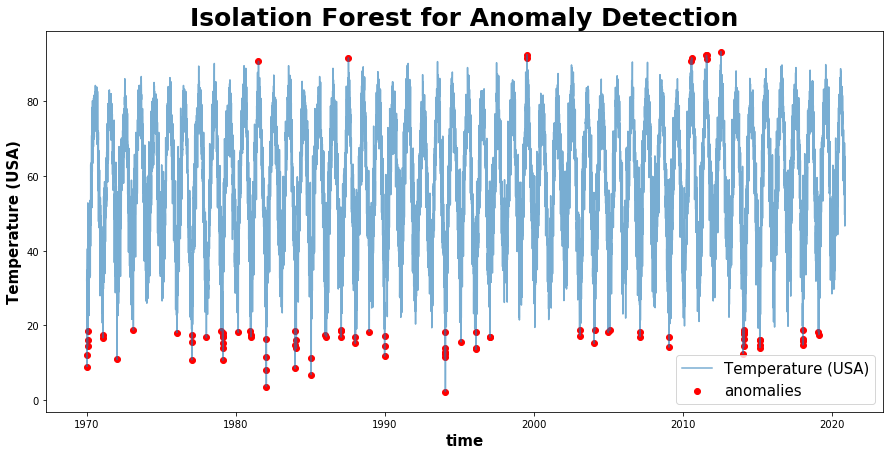

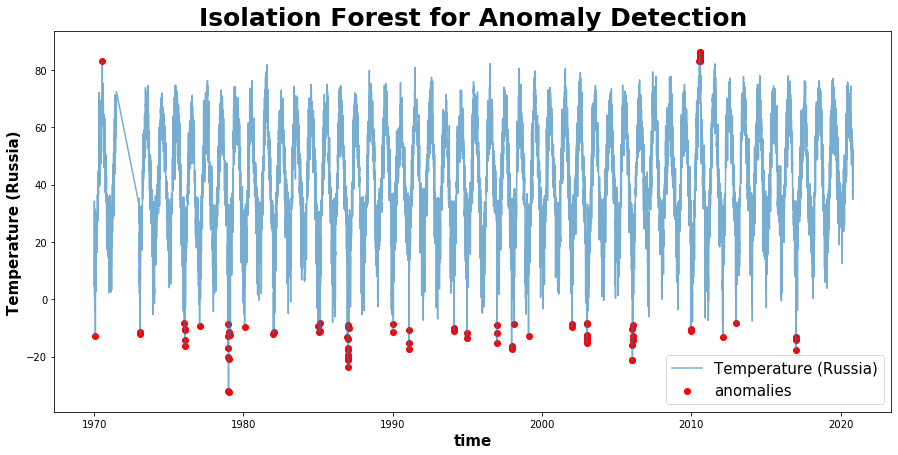

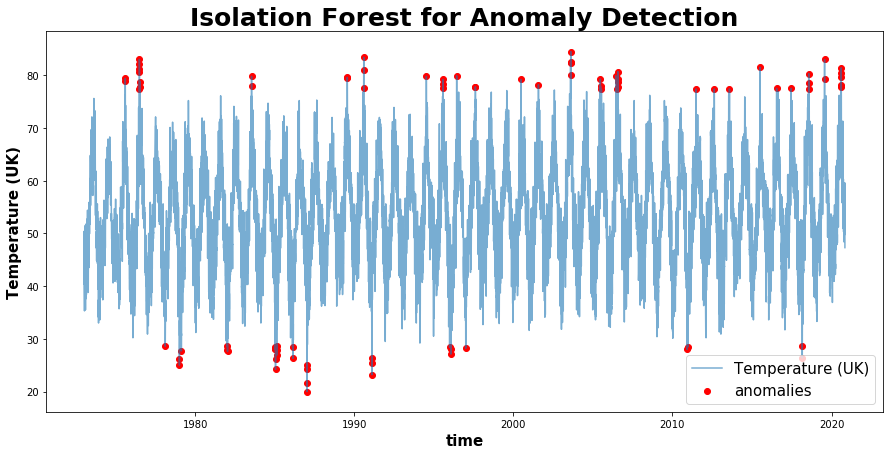

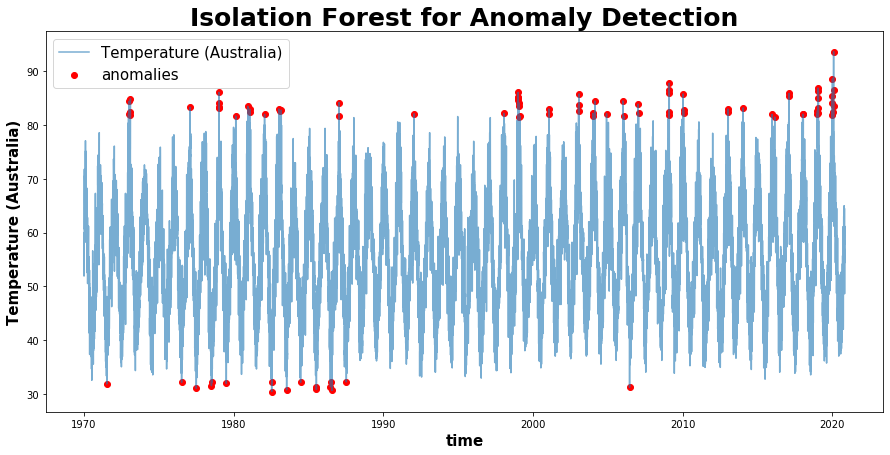

In [43]:
isoForest(data=history,attribute='temp', name='Temperature (USA)')
isoForest(data=russia,attribute='temp', name='Temperature (Russia)')
isoForest(data=uk,attribute='temp', name='Temperature (UK)')
isoForest(data=australia,attribute='temp', name='Temperature (Australia)')

### Lets check using Local Outlier Factor

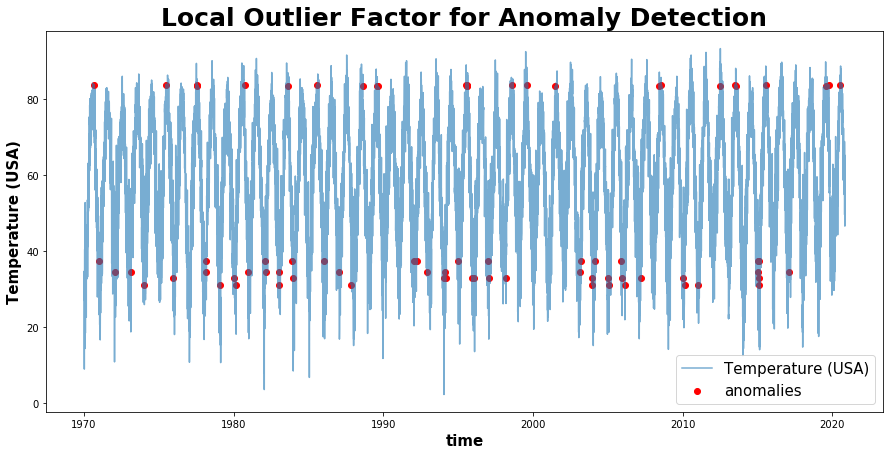

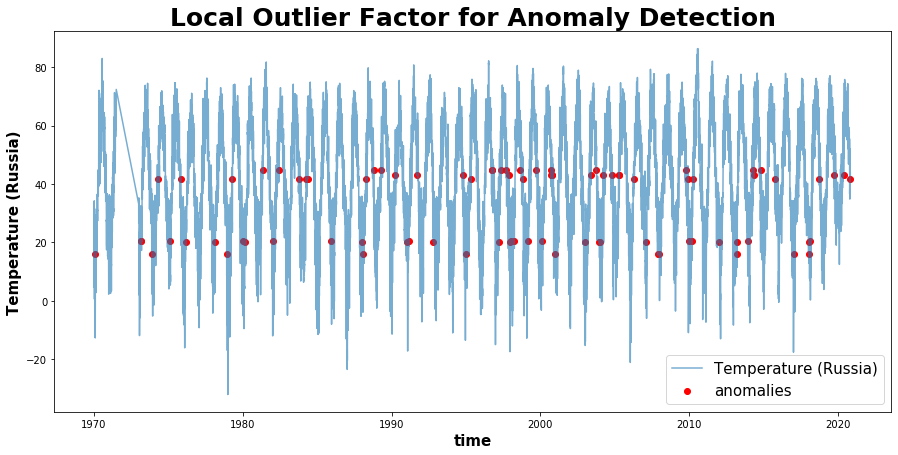

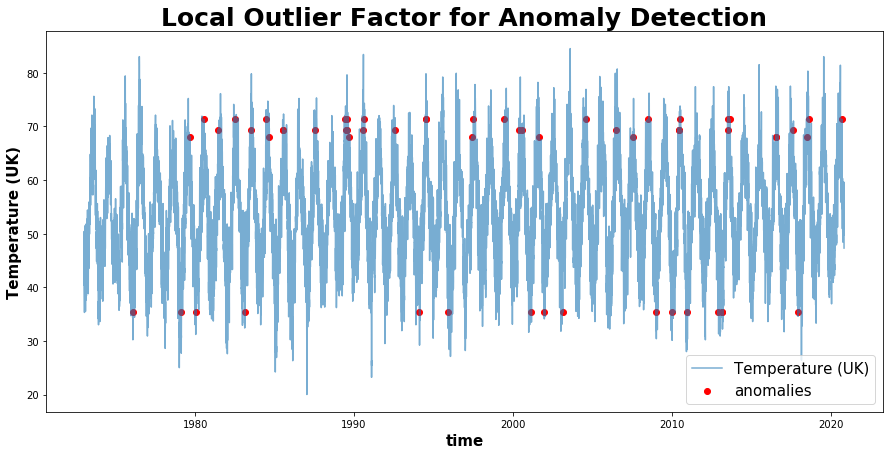

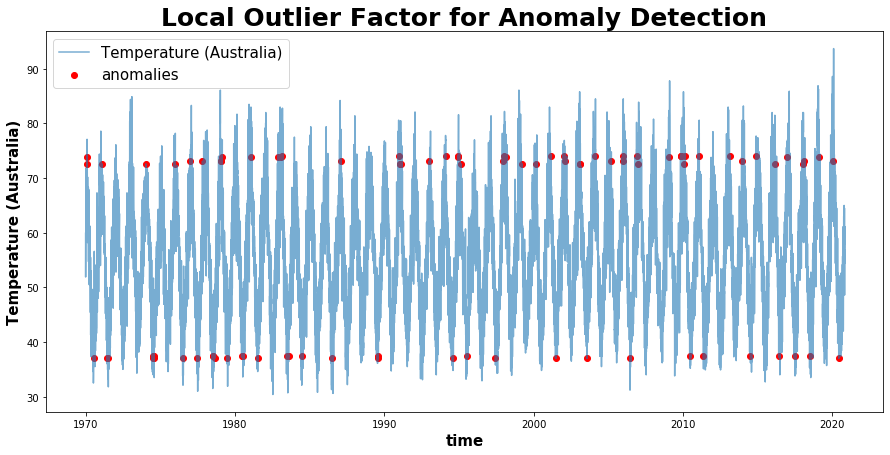

In [44]:
lof_model(data=history,attribute='temp',name='Temperature (USA)')
lof_model(data=russia,attribute='temp',name='Temperature (Russia)')
lof_model(data=uk,attribute='temp',name='Temperature (UK)')
lof_model(data=australia,attribute='temp',name='Temperature (Australia)')

### Now Let us try to detect anomalies for Precipitation feature from all 4 countries using Isolation Forest

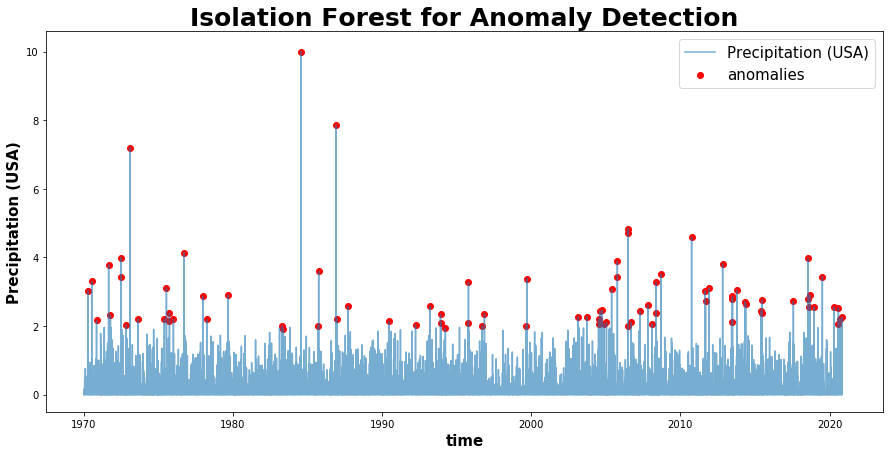

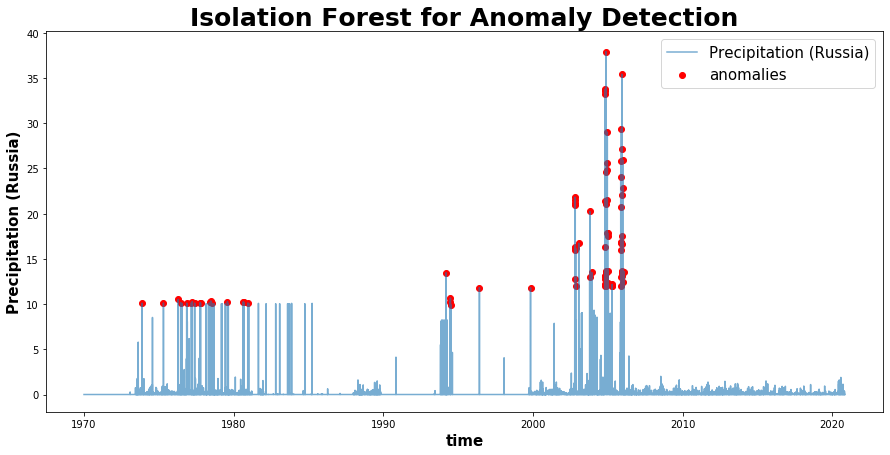

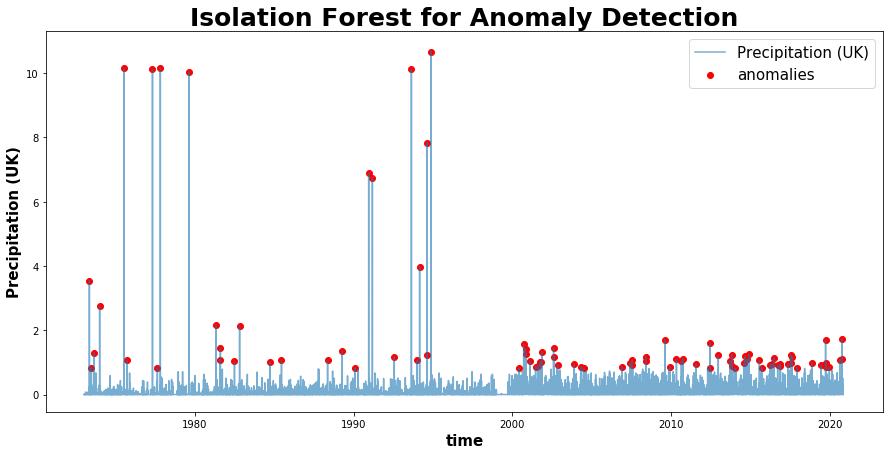

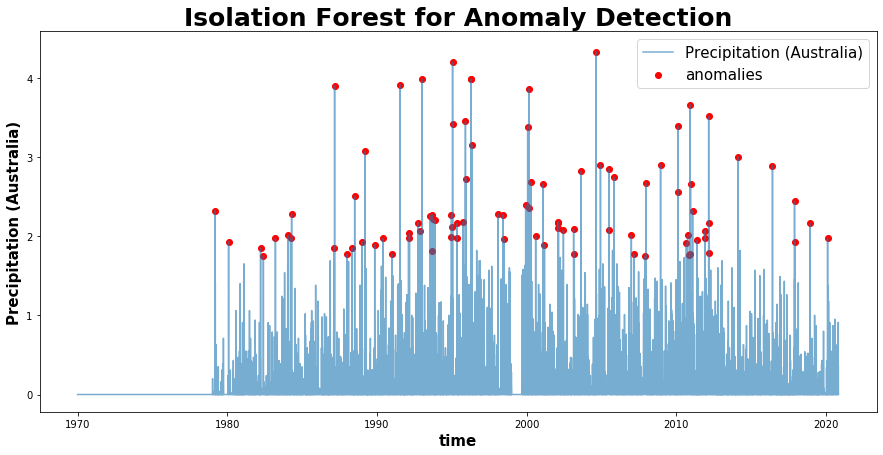

In [45]:
isoForest(data=history,attribute='Precipitation', name='Precipitation (USA)')
isoForest(data=russia,attribute='Precipitation', name='Precipitation (Russia)')
isoForest(data=uk,attribute='Precipitation', name='Precipitation (UK)')
isoForest(data=australia,attribute='Precipitation', name='Precipitation (Australia)')

### Lets check using Local Outlier Factor

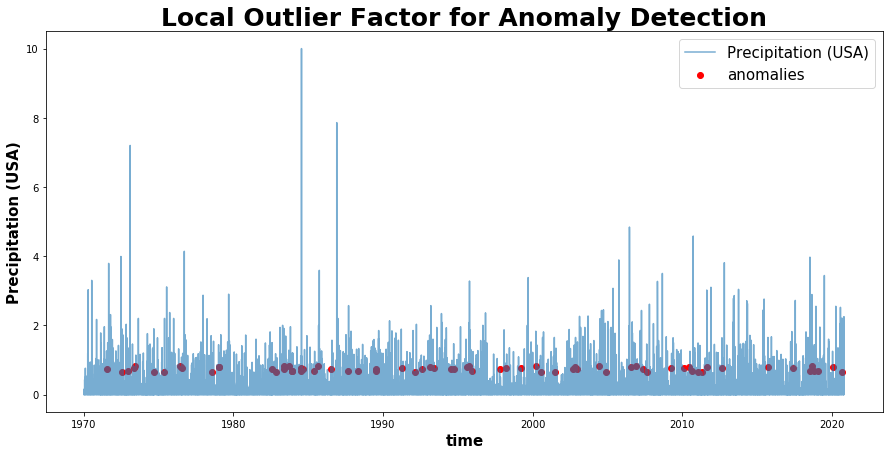

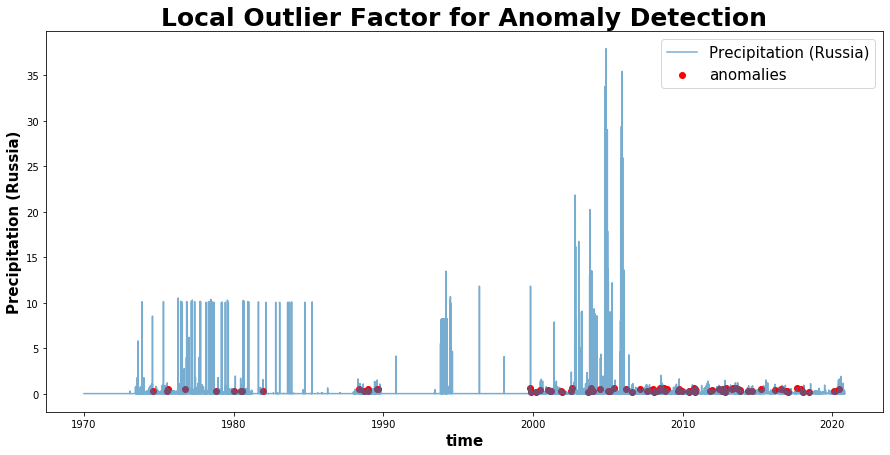

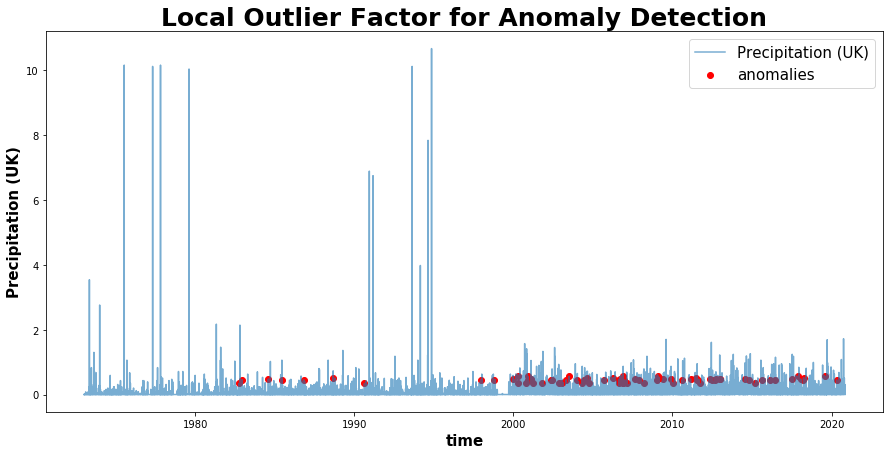

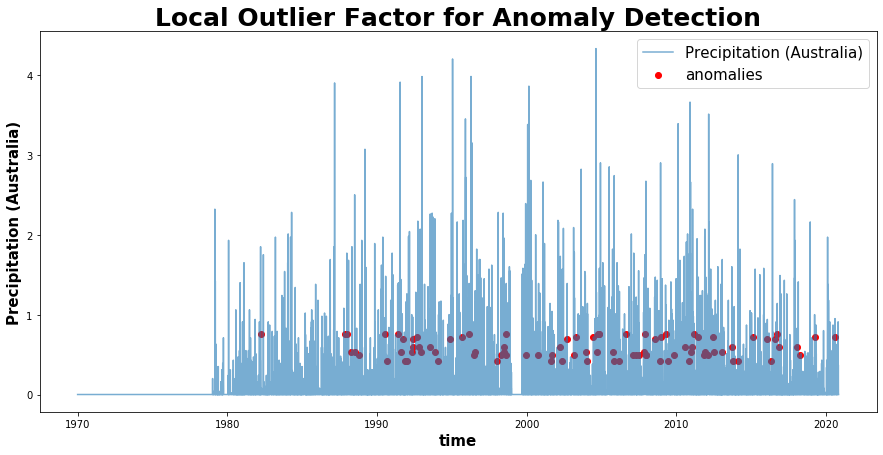

In [46]:
lof_model(data=history,attribute='Precipitation',name='Precipitation (USA)')
lof_model(data=russia,attribute='Precipitation',name='Precipitation (Russia)')
lof_model(data=uk,attribute='Precipitation',name='Precipitation (UK)')
lof_model(data=australia,attribute='Precipitation',name='Precipitation (Australia)')

### Now Let us try to detect anomalies for Wind Speed feature from all 4 countries using Isolation Forest

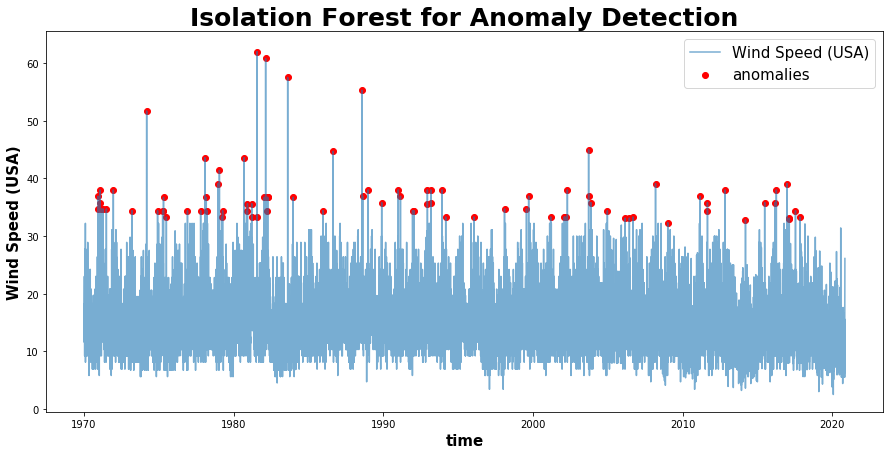

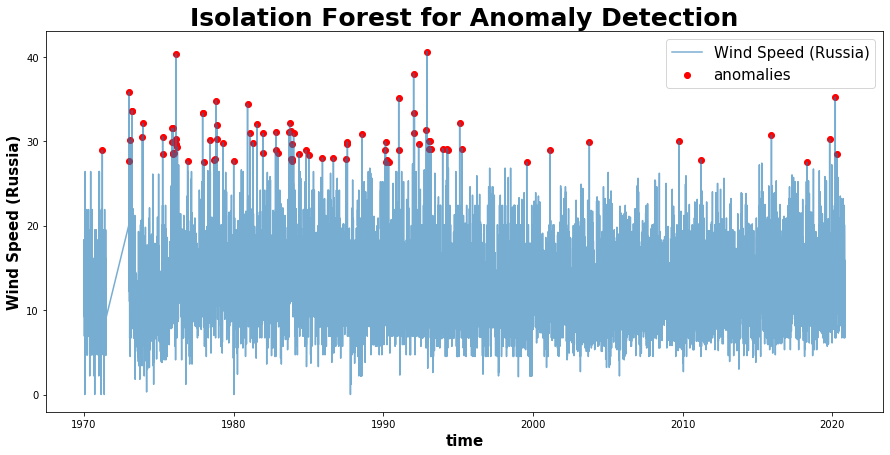

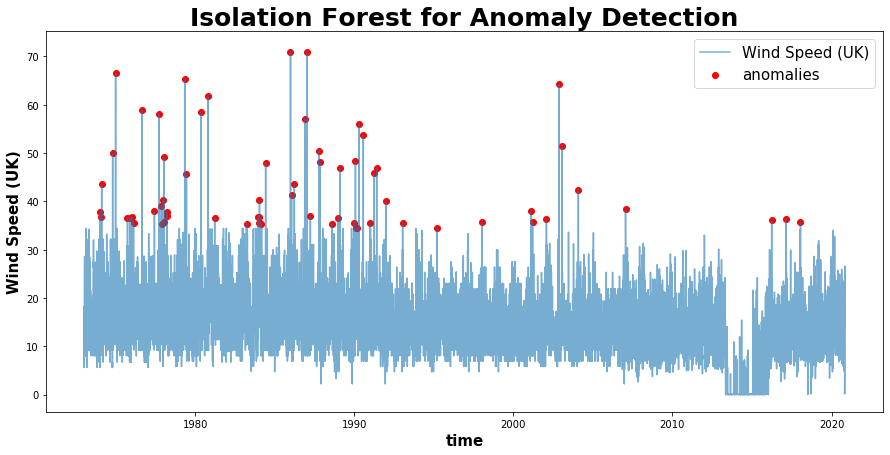

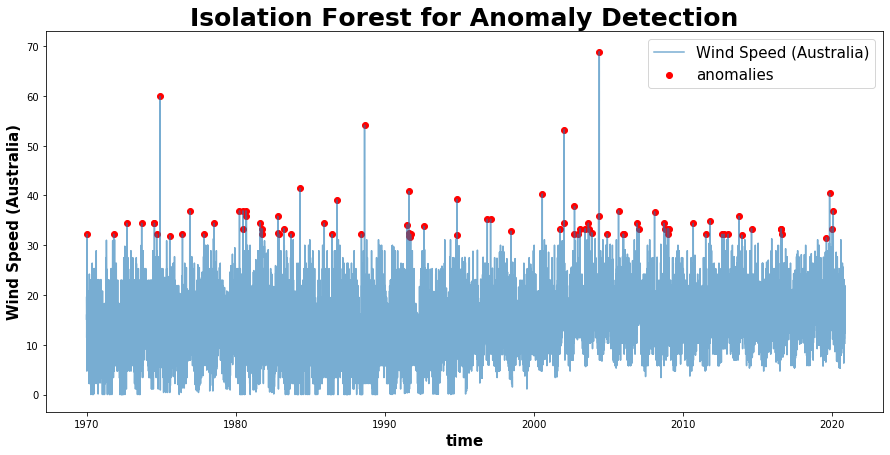

In [47]:
isoForest(data=history,attribute='windSpeed', name='Wind Speed (USA)')
isoForest(data=russia,attribute='windSpeed', name='Wind Speed (Russia)')
isoForest(data=uk,attribute='windSpeed', name='Wind Speed (UK)')
isoForest(data=australia,attribute='windSpeed', name='Wind Speed (Australia)')

### Lets check using Local Outlier Factor

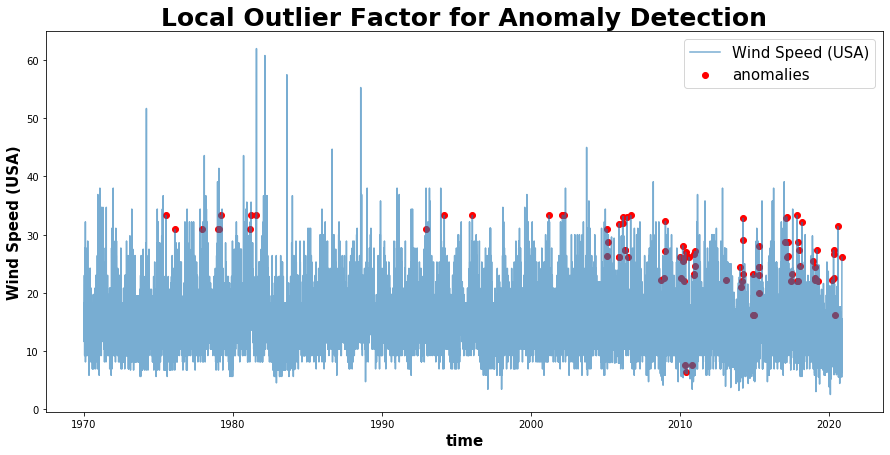

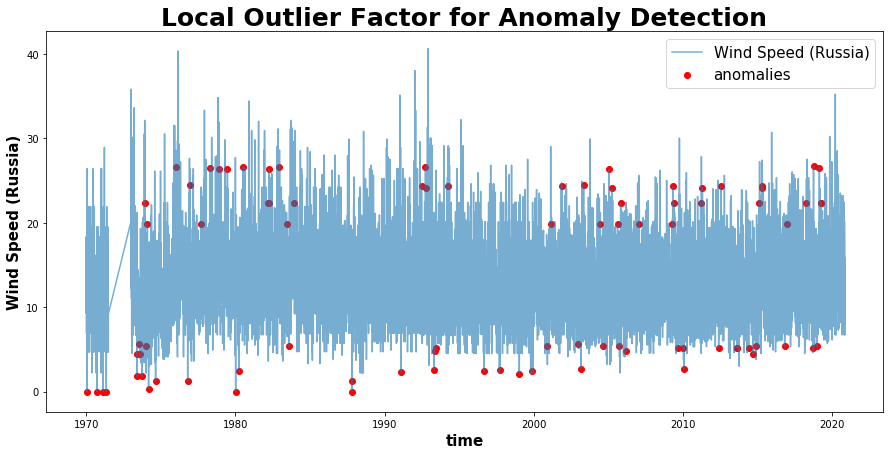

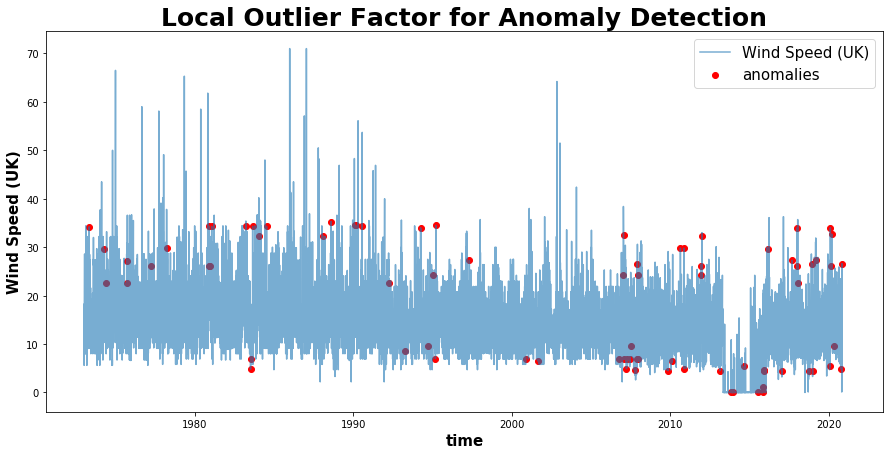

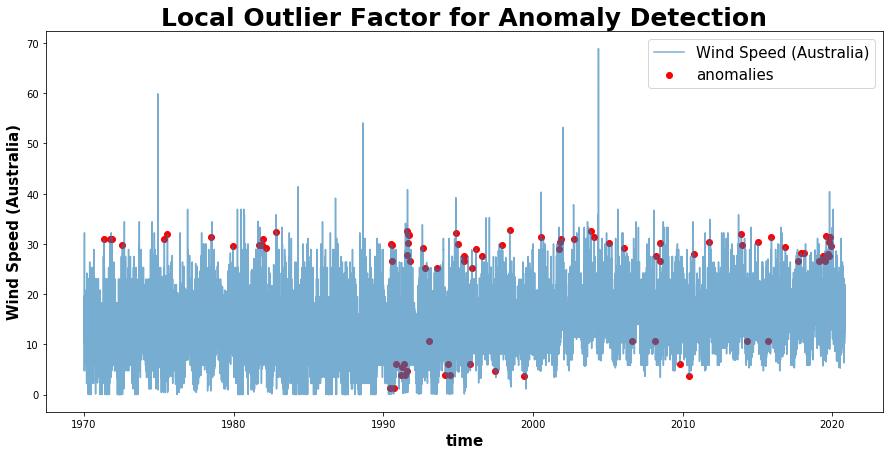

In [48]:
lof_model(data=history,attribute='windSpeed',name='Wind Speed (USA)')
lof_model(data=russia,attribute='windSpeed',name='Wind Speed (Russia)')
lof_model(data=uk,attribute='windSpeed',name='Wind Speed (UK)')
lof_model(data=australia,attribute='windSpeed',name='Wind Speed (Australia)')

### Now Let us try to detect anomalies for Visibility feature from all 4 countries using Isolation Forest

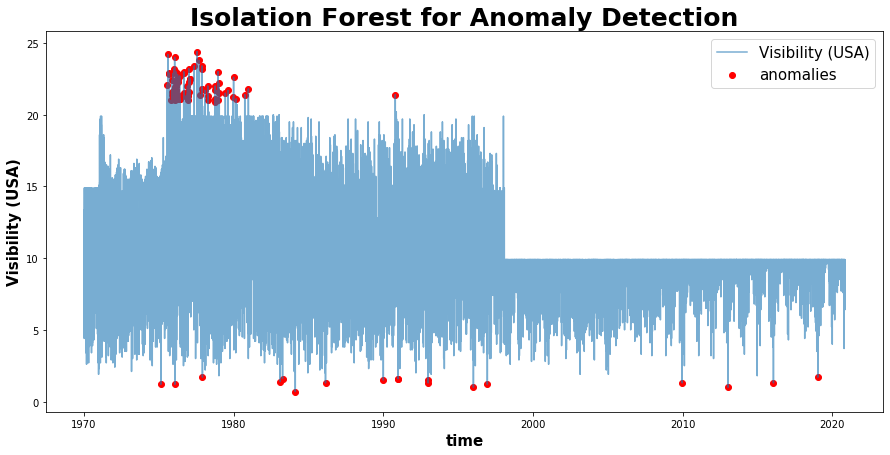

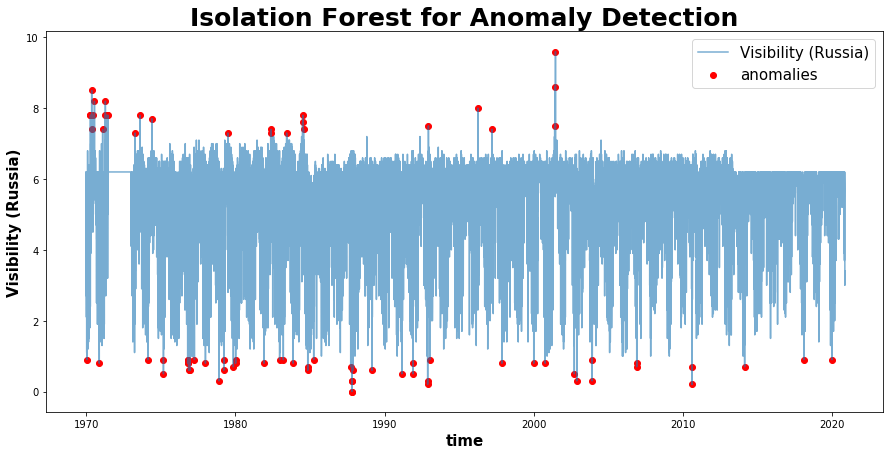

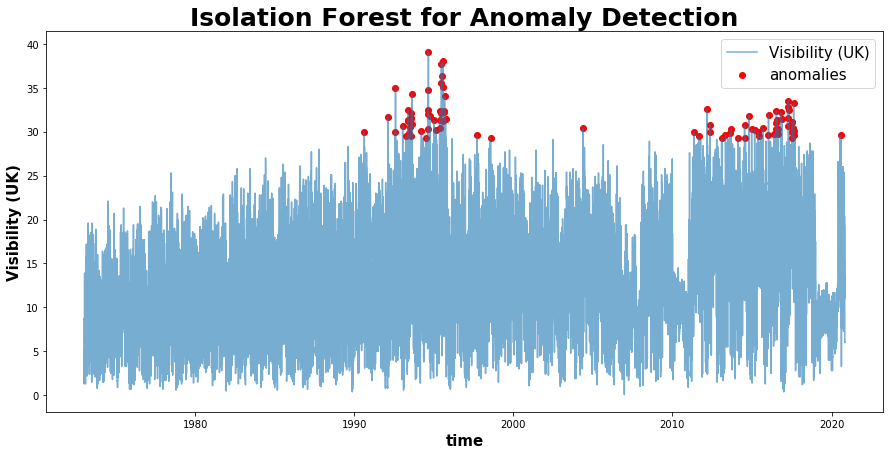

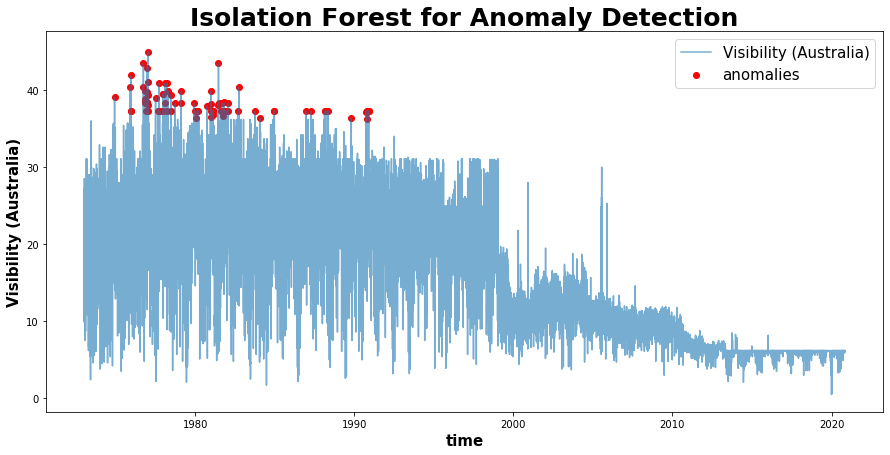

In [49]:
isoForest(data=history,attribute='Visibility', name='Visibility (USA)')
isoForest(data=russia.dropna(subset=['Visibility']),attribute='Visibility', name='Visibility (Russia)')
isoForest(data=uk,attribute='Visibility', name='Visibility (UK)')
isoForest(data=australia.dropna(subset=['Visibility']),attribute='Visibility', name='Visibility (Australia)')

### Lets check using Local Outlier Factor

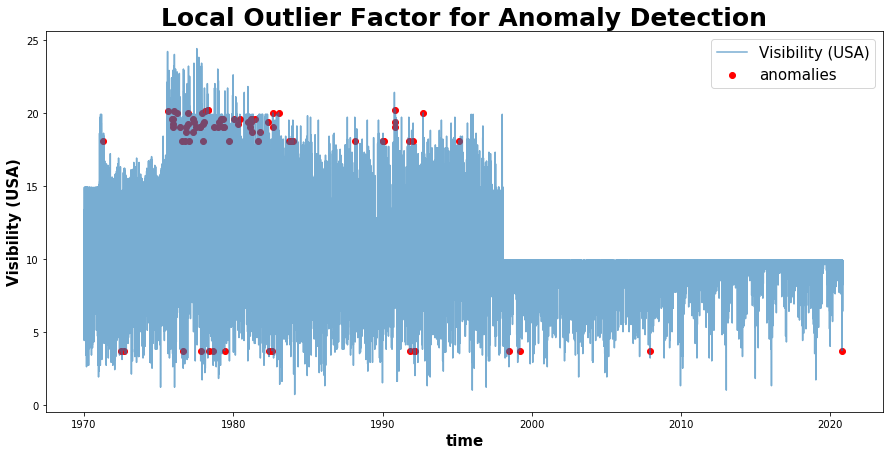

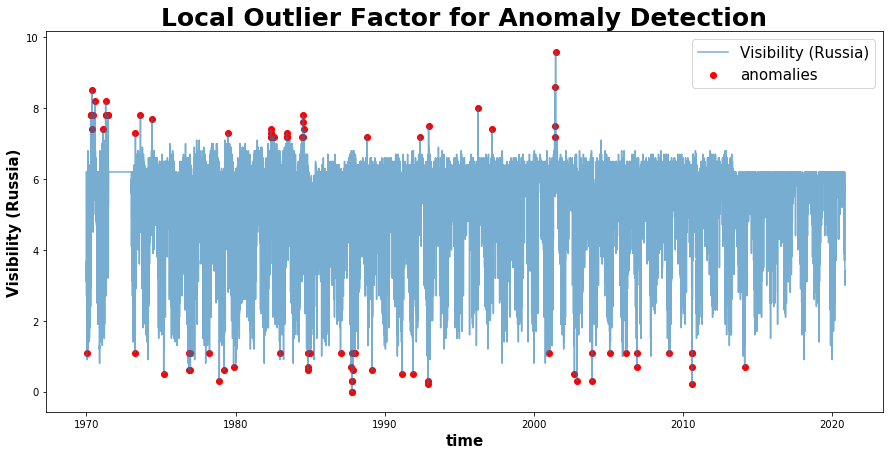

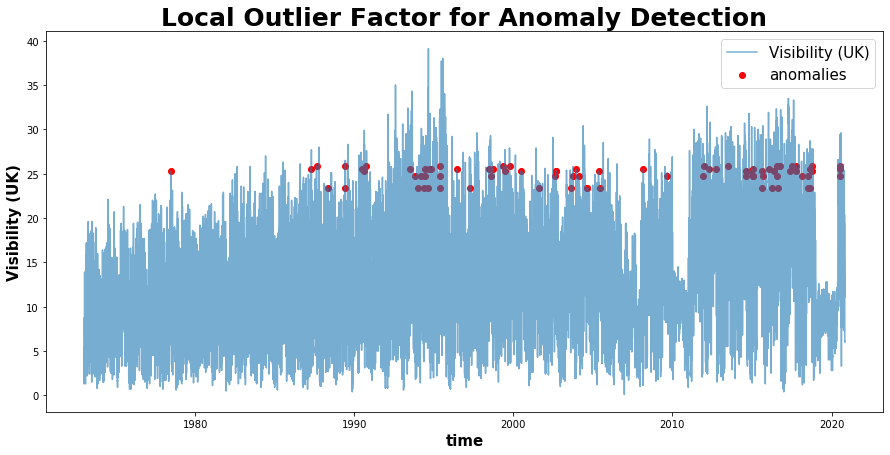

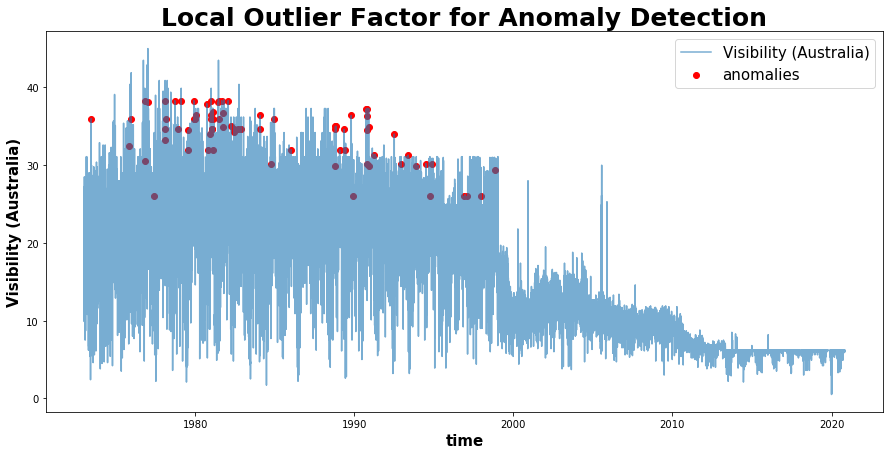

In [50]:
lof_model(data=history,attribute='Visibility',name='Visibility (USA)')
lof_model(data=russia.dropna(subset=['Visibility']),attribute='Visibility',name='Visibility (Russia)')
lof_model(data=uk,attribute='Visibility',name='Visibility (UK)')
lof_model(data=australia.dropna(subset=['Visibility']),attribute='Visibility',name='Visibility (Australia)')

### Now Let us try to detect anomalies for Cloud Cover feature from all 4 countries using Isolation Forest

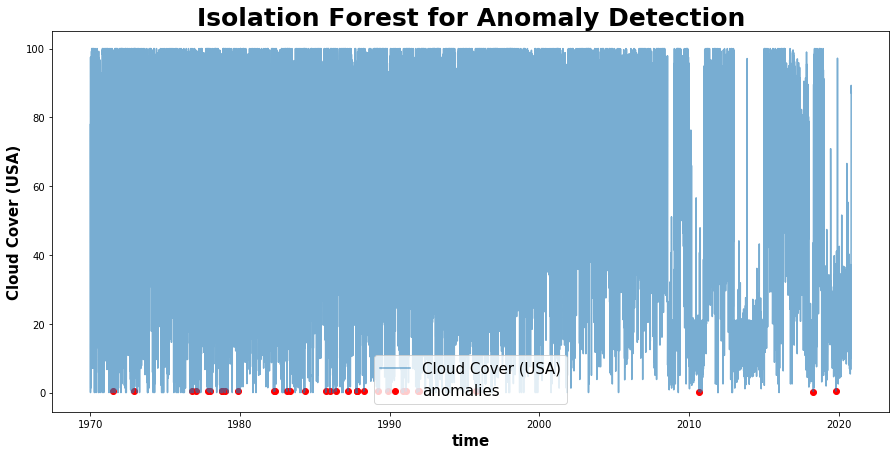

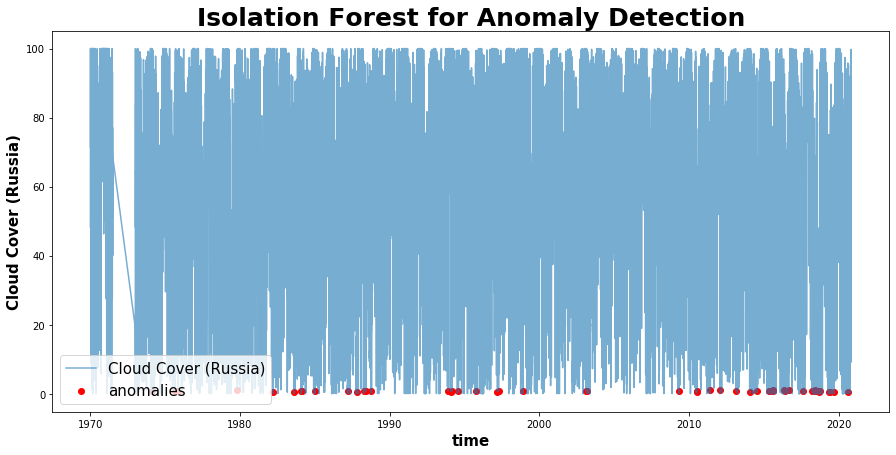

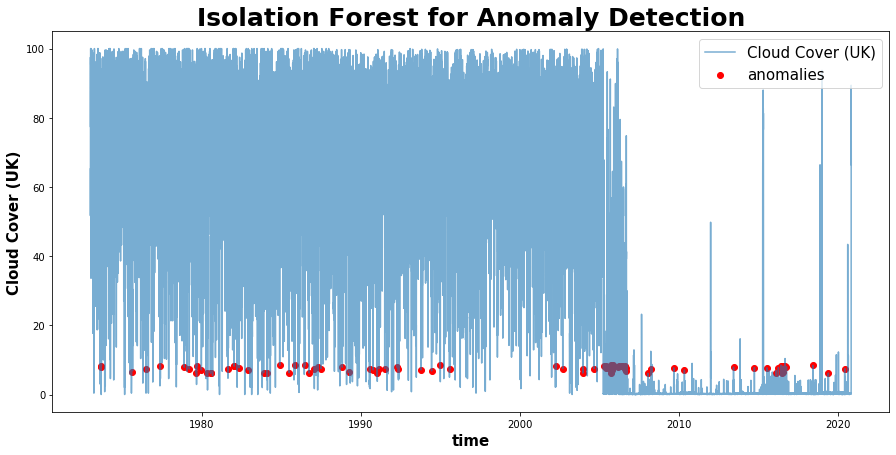

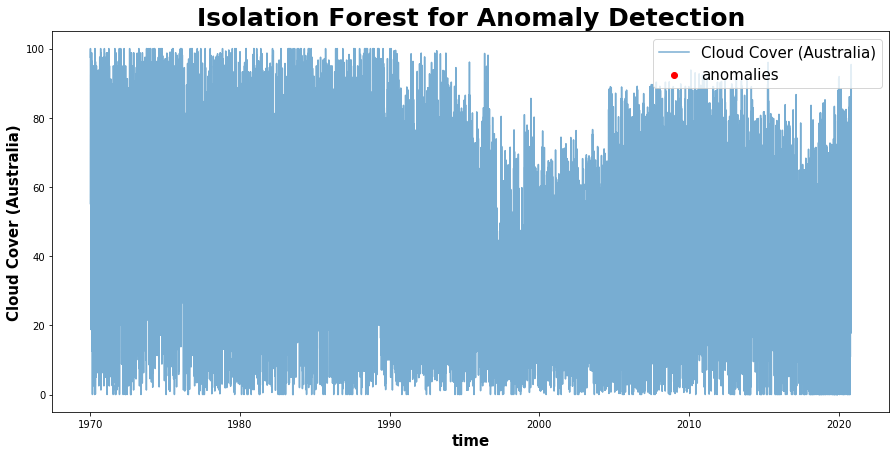

In [51]:
isoForest(data=history,attribute='cloudCover', name='Cloud Cover (USA)')
isoForest(data=russia.dropna(subset=['cloudCover']),attribute='cloudCover', name='Cloud Cover (Russia)')
isoForest(data=uk.dropna(subset=['cloudCover']),attribute='cloudCover', name='Cloud Cover (UK)')
isoForest(data=australia.dropna(subset=['cloudCover']),attribute='cloudCover', name='Cloud Cover (Australia)')

### Lets check using Local Outlier Factor

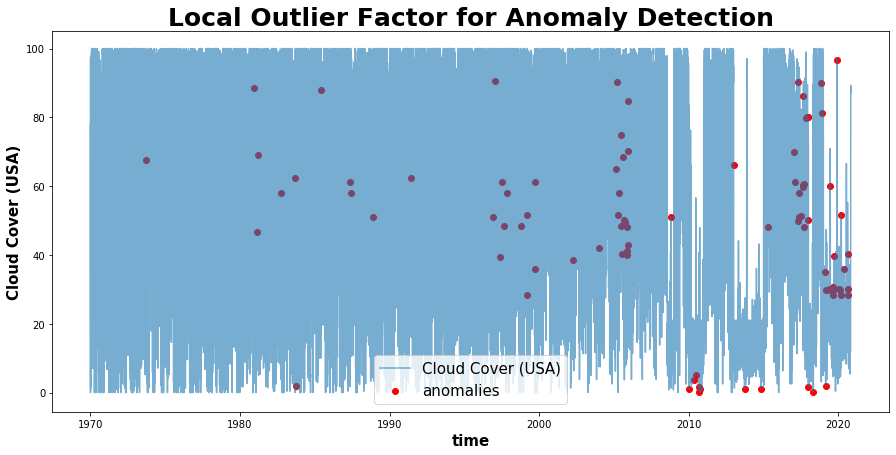

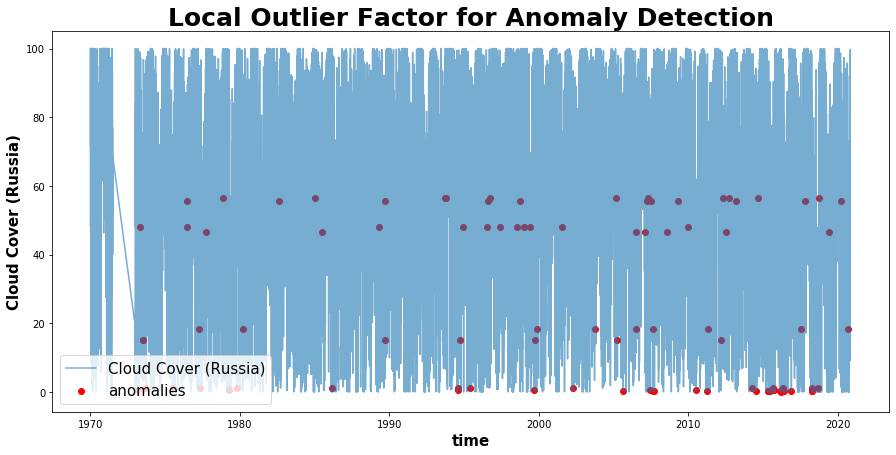

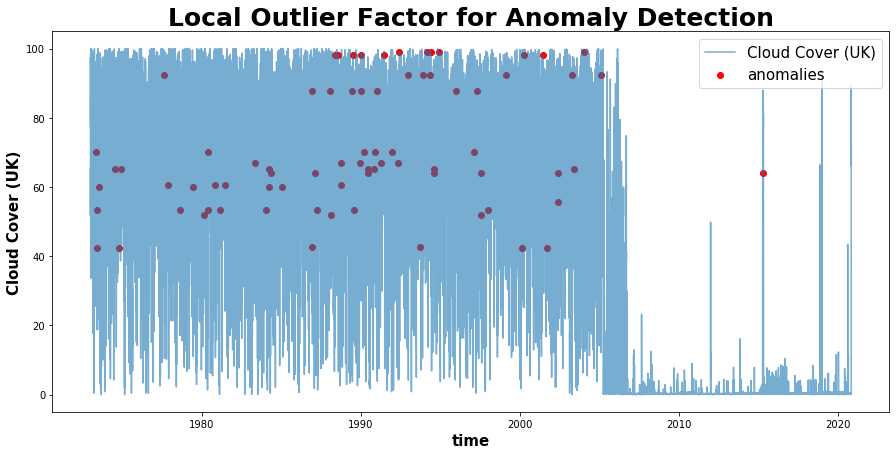

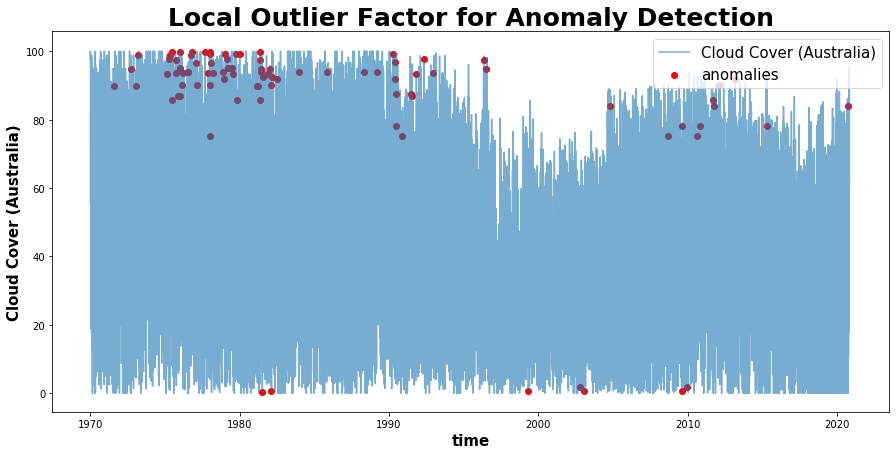

In [52]:
lof_model(data=history,attribute='cloudCover',name='Cloud Cover (USA)')
lof_model(data=russia.dropna(subset=['cloudCover']),attribute='cloudCover',name='Cloud Cover (Russia)')
lof_model(data=uk.dropna(subset=['cloudCover']),attribute='cloudCover',name='Cloud Cover (UK)')
lof_model(data=australia.dropna(subset=['cloudCover']),attribute='cloudCover',name='Cloud Cover (Australia)')

### Now Let us try to detect anomalies for Relative Humidity feature from all 4 countries using Isolation Forest

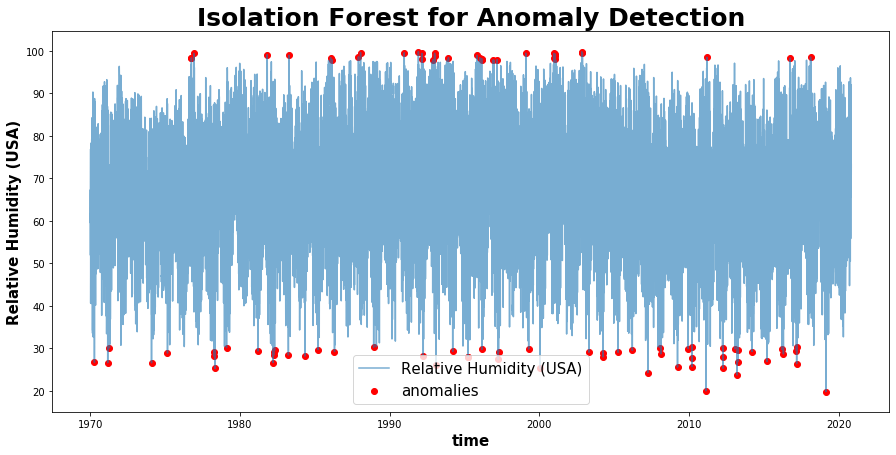

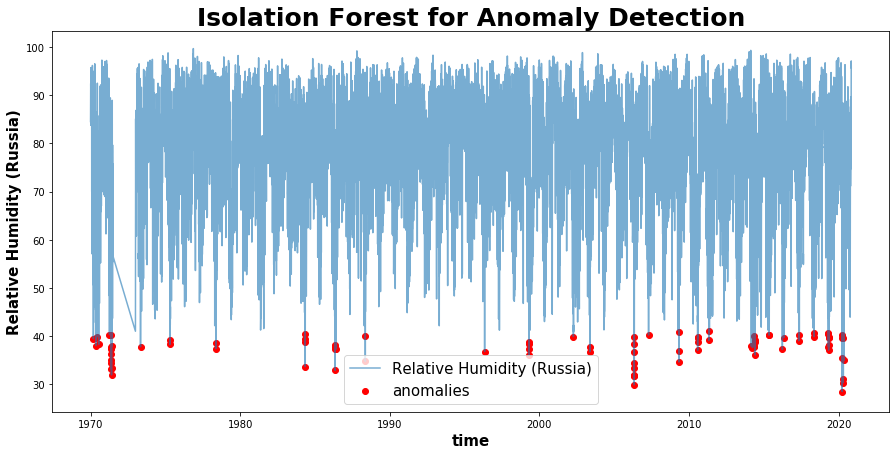

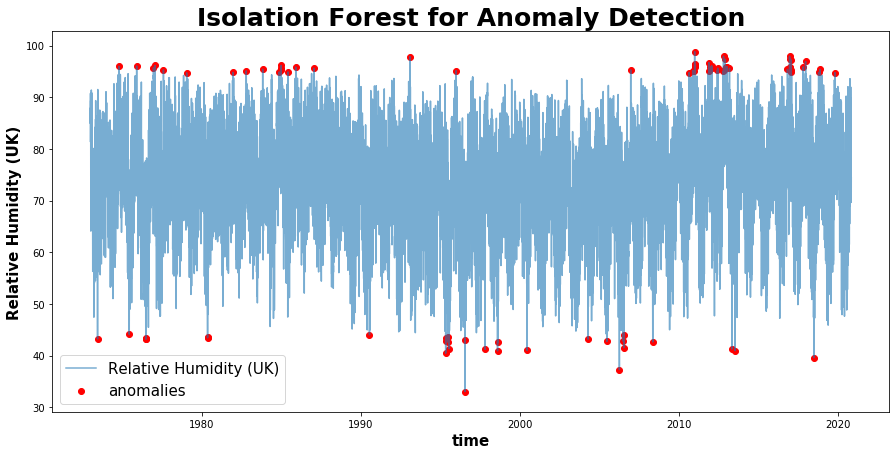

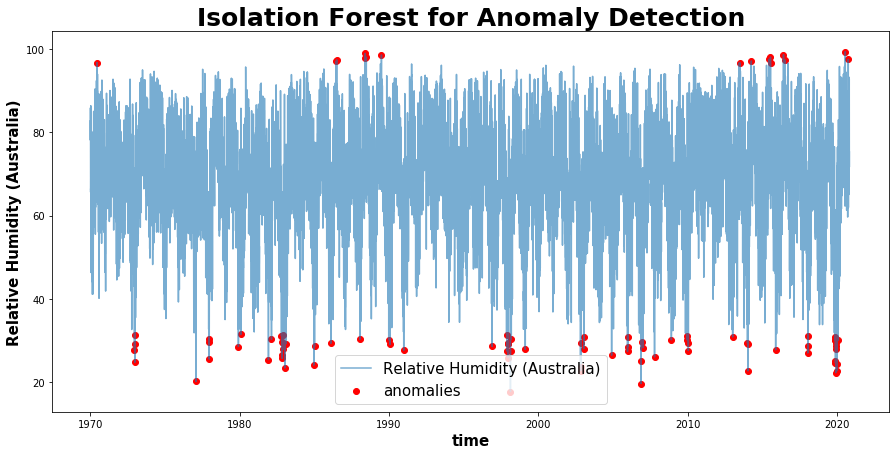

In [53]:
isoForest(data=history,attribute='relHumidity', name='Relative Humidity (USA)')
isoForest(data=russia,attribute='relHumidity', name='Relative Humidity (Russia)')
isoForest(data=uk,attribute='relHumidity', name='Relative Humidity (UK)')
isoForest(data=australia,attribute='relHumidity', name='Relative Humidity (Australia)')

### Lets check using Local Outlier Factor

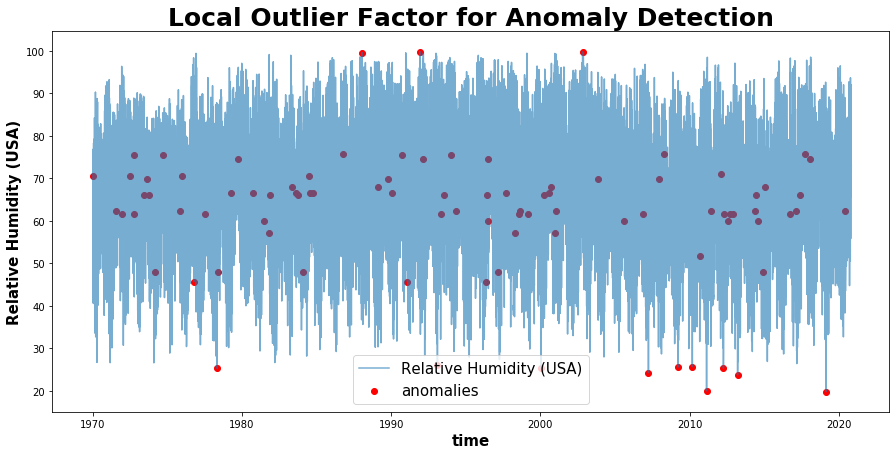

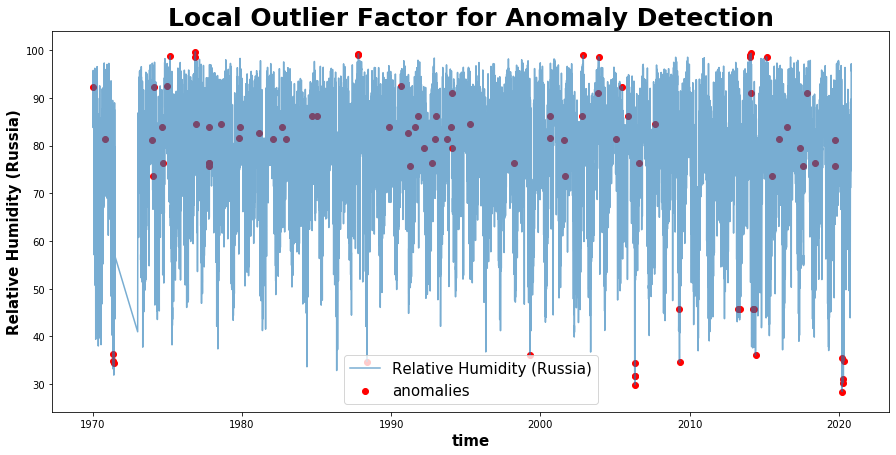

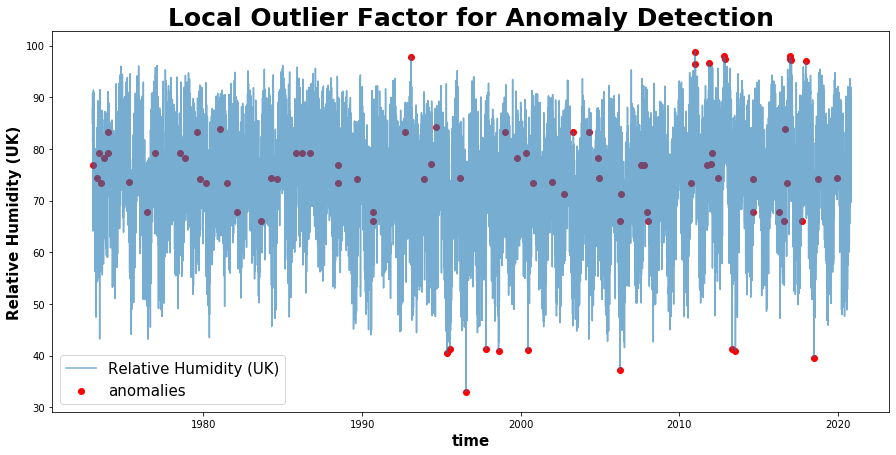

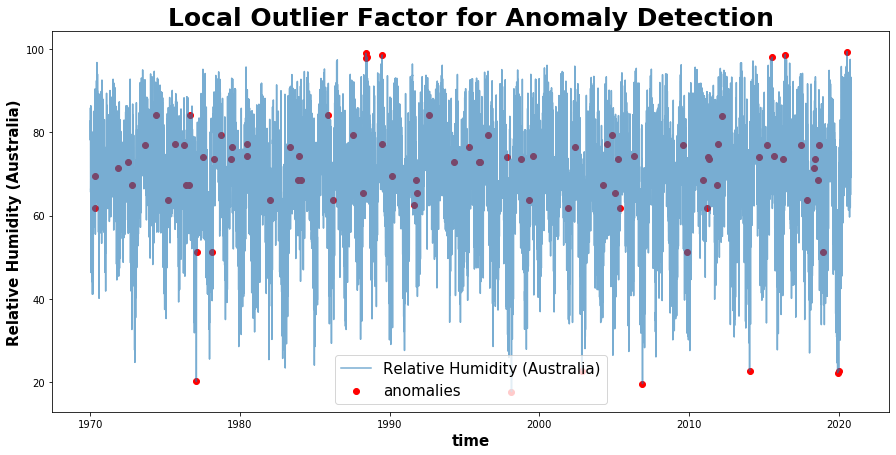

In [54]:
lof_model(data=history,attribute='relHumidity',name='Relative Humidity (USA)')
lof_model(data=russia.dropna(subset=['cloudCover']),attribute='relHumidity',name='Relative Humidity (Russia)')
lof_model(data=uk.dropna(subset=['cloudCover']),attribute='relHumidity',name='Relative Humidity (UK)')
lof_model(data=australia.dropna(subset=['cloudCover']),attribute='relHumidity',name='Relative Humidity (Australia)')

## Before going further let us also check anomalies for global data and find out if we can get some interesting insights

In [55]:
globalTemp=pd.read_csv("https://raw.githubusercontent.com/Manudeep-git/731_Final_Project/main/world/data/Temperatures/GlobalTemperatures.csv")
globalTemp.head()

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1750-01-01                   3.034                              3.574   
1  1750-02-01                   3.083                              3.702   
2  1750-03-01                   5.626                              3.076   
3  1750-04-01                   8.490                              2.451   
4  1750-05-01                  11.573                              2.072   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                 NaN                            NaN                 NaN   
1                 NaN                            NaN                 NaN   
2                 NaN                            NaN                 NaN   
3                 NaN                            NaN                 NaN   
4                 NaN                            NaN                 NaN   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                            NaN                             NaN   
1                            NaN                             NaN   
2                            NaN                             NaN   
3                            NaN                             NaN   
4                            NaN                             NaN   

   LandAndOceanAverageTemperatureUncertainty  
0                                        NaN  
1                                        NaN  
2                                        NaN  
3                                        NaN  
4                                        NaN

### Let us modify feature names and type 

In [56]:
globalTemp.rename(columns = {'dt':'time'}, inplace=True)
globalTemp['time']=pd.to_datetime(globalTemp.time)

LandAverage=globalTemp[['time','LandAverageTemperature','LandAverageTemperatureUncertainty']].dropna()
globalTemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   time                                       3192 non-null   datetime64[ns]
 1   LandAverageTemperature                     3180 non-null   float64       
 2   LandAverageTemperatureUncertainty          3180 non-null   float64       
 3   LandMaxTemperature                         1992 non-null   float64       
 4   LandMaxTemperatureUncertainty              1992 non-null   float64       
 5   LandMinTemperature                         1992 non-null   float64       
 6   LandMinTemperatureUncertainty              1992 non-null   float64       
 7   LandAndOceanAverageTemperature             1992 non-null   float64       
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64       
dtypes: datetime64[ns](1)

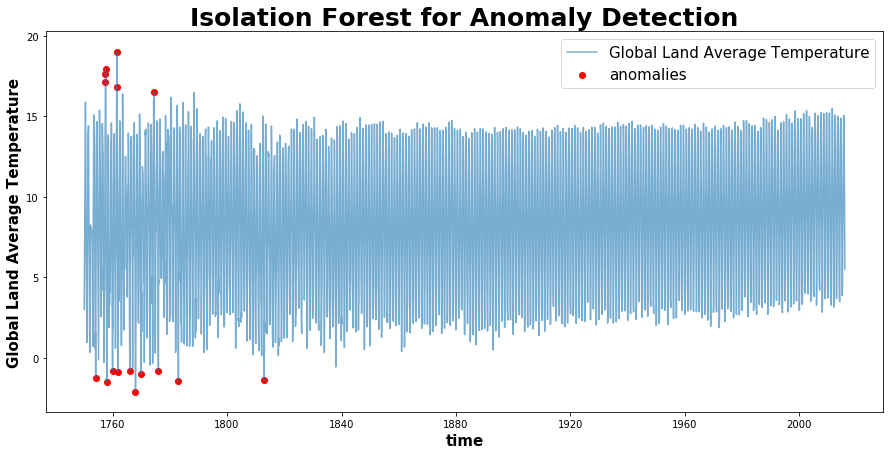

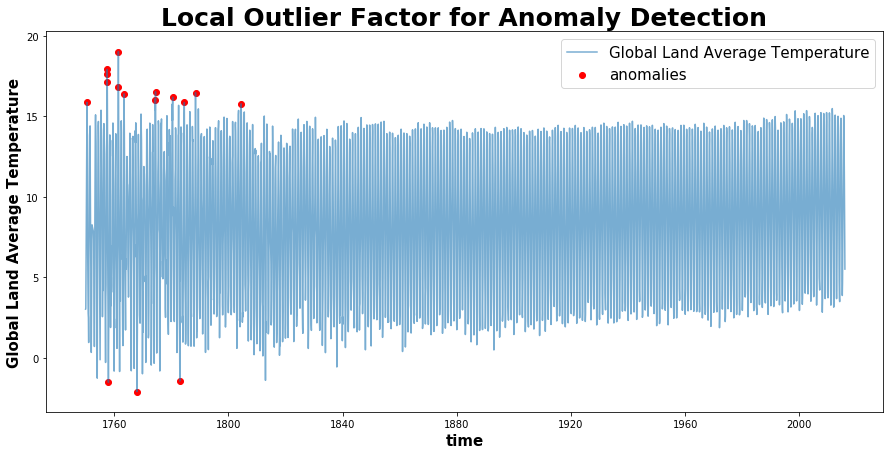

In [57]:
isoForest(data=LandAverage, attribute='LandAverageTemperature', name='Global Land Average Temperature')
lof_model(data=LandAverage, attribute='LandAverageTemperature', name='Global Land Average Temperature')

## Let us check anomaliesfor the uncertainies of LandAverageTemperature feature

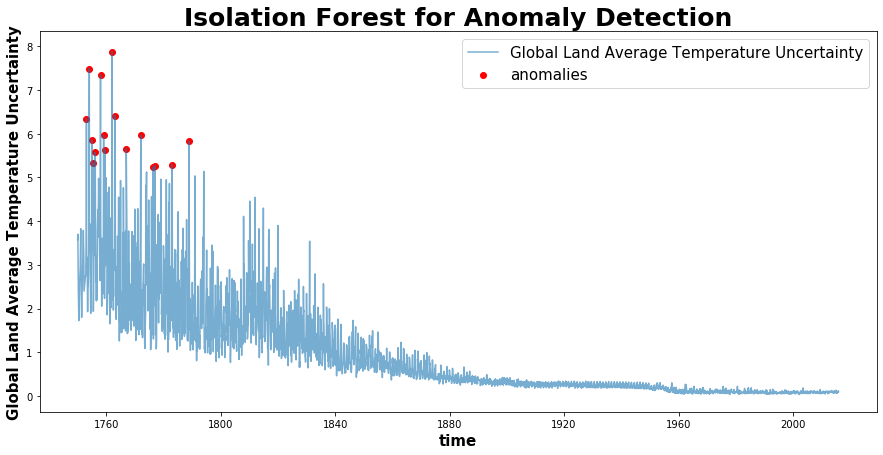

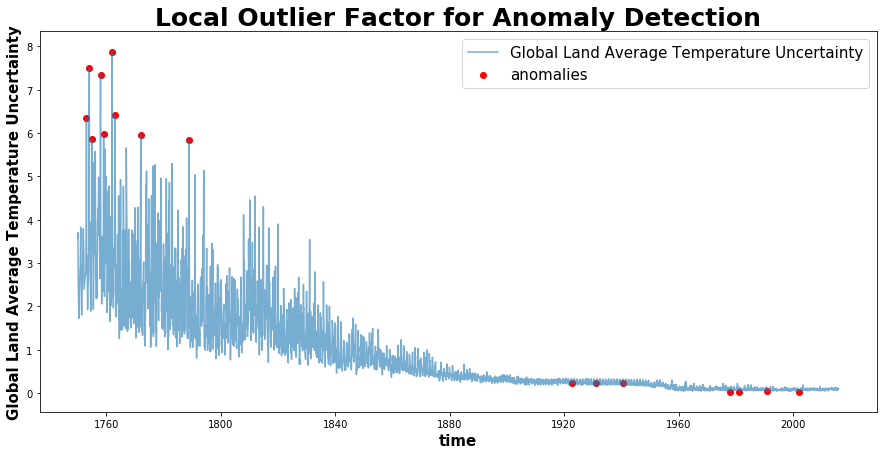

In [58]:
isoForest(data=LandAverage, attribute='LandAverageTemperatureUncertainty', name='Global Land Average Temperature Uncertainty')
lof_model(data=LandAverage, attribute='LandAverageTemperatureUncertainty', name='Global Land Average Temperature Uncertainty')

### Now let us modify our dataframe 

In [59]:
globalOtherFeatures= globalTemp.drop(columns=['LandAverageTemperature','LandAverageTemperatureUncertainty']).dropna()
globalOtherFeatures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 1200 to 3191
Data columns (total 7 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   time                                       1992 non-null   datetime64[ns]
 1   LandMaxTemperature                         1992 non-null   float64       
 2   LandMaxTemperatureUncertainty              1992 non-null   float64       
 3   LandMinTemperature                         1992 non-null   float64       
 4   LandMinTemperatureUncertainty              1992 non-null   float64       
 5   LandAndOceanAverageTemperature             1992 non-null   float64       
 6   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 124.5 KB


## Let us check anomalies for Land Maximum Temperature

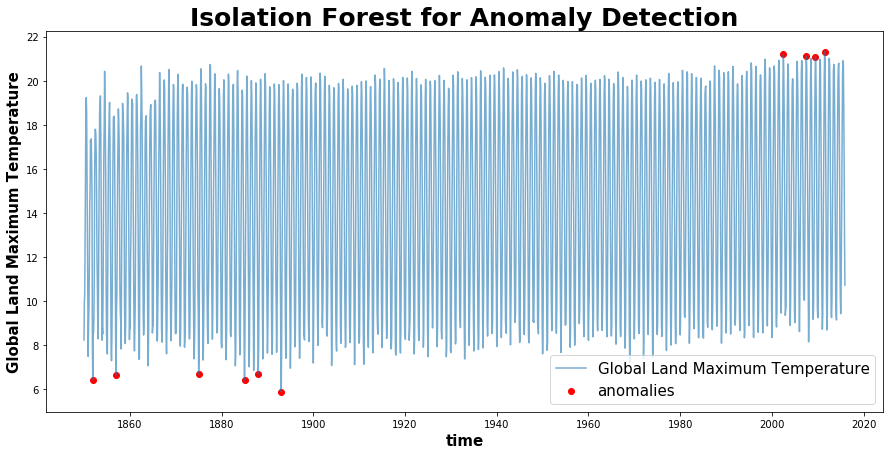

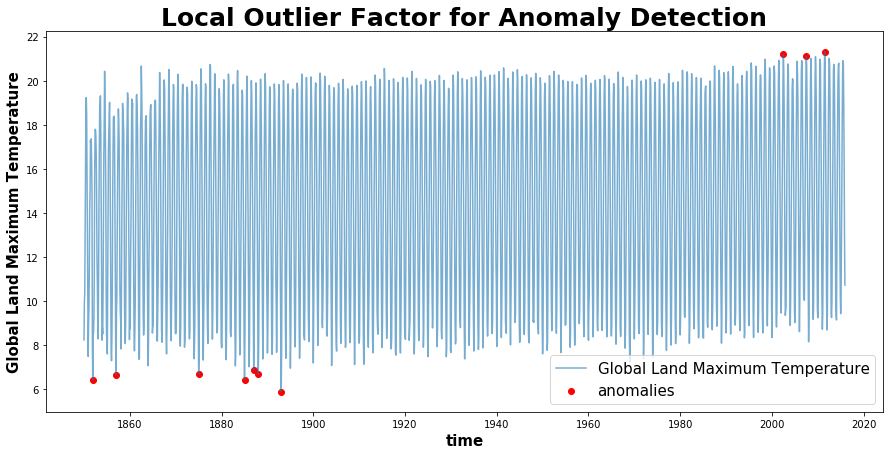

In [60]:
isoForest(data=globalOtherFeatures, attribute='LandMaxTemperature', name='Global Land Maximum Temperature')
lof_model(data=globalOtherFeatures, attribute='LandMaxTemperature', name='Global Land Maximum Temperature')

## Let us check anomalies for Land Minimum Temperature

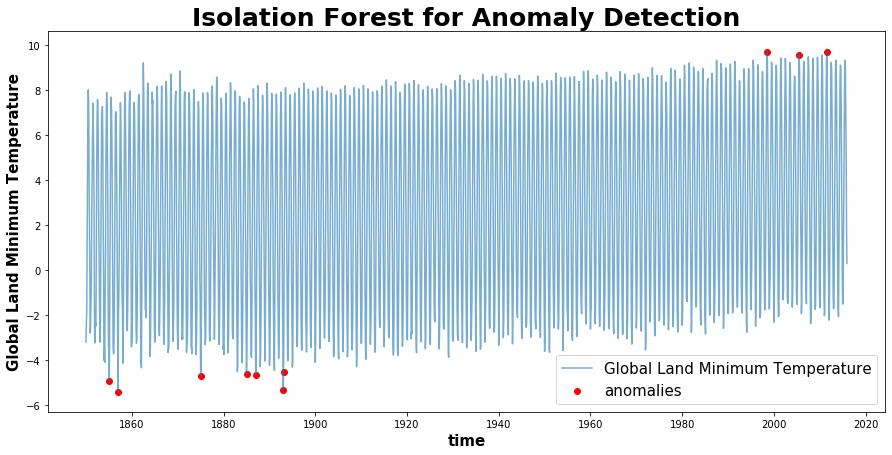

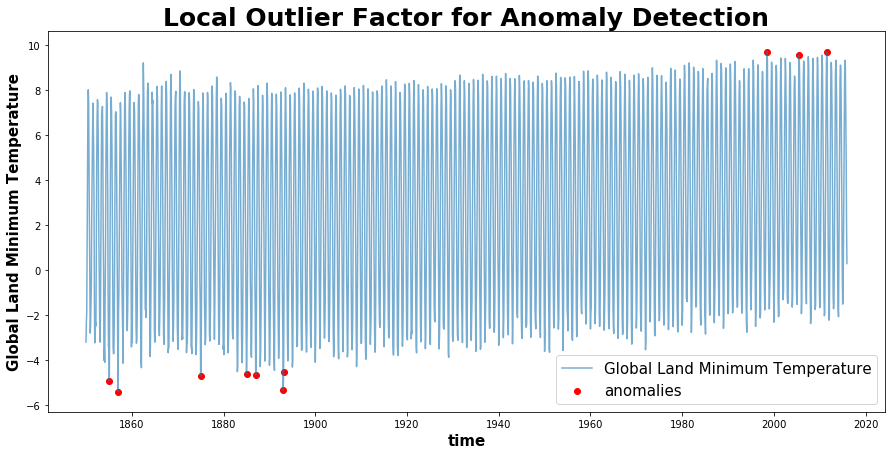

In [61]:
isoForest(data=globalOtherFeatures, attribute='LandMinTemperature', name='Global Land Minimum Temperature')
lof_model(data=globalOtherFeatures, attribute='LandMinTemperature', name='Global Land Minimum Temperature')

## Let us check anomalies for Land and Ocean Average Temperature

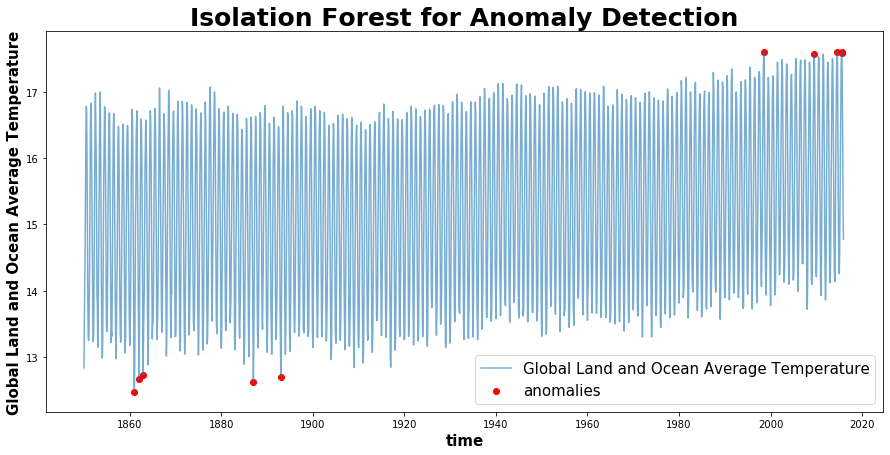

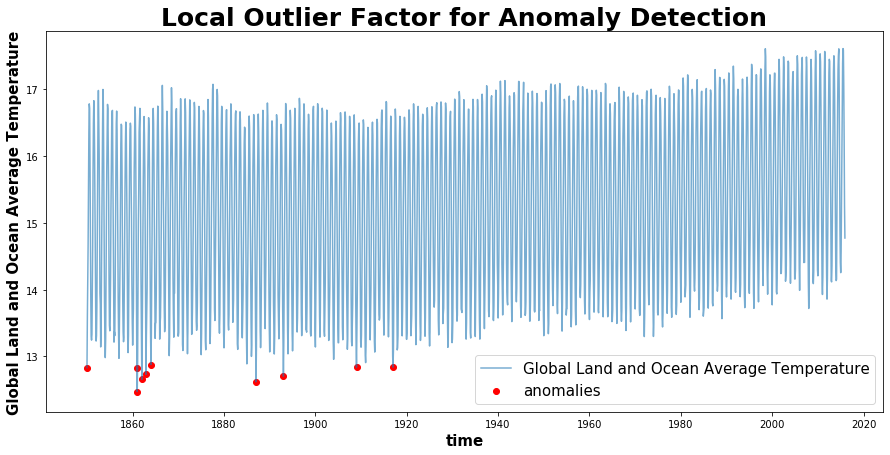

In [62]:
isoForest(data=globalOtherFeatures, attribute='LandAndOceanAverageTemperature', name='Global Land and Ocean Average Temperature')
lof_model(data=globalOtherFeatures, attribute='LandAndOceanAverageTemperature', name='Global Land and Ocean Average Temperature')

## Let us import fossil fuels data into our dataframe

In [63]:
fossilfuels=pd.read_csv("https://raw.githubusercontent.com/Manudeep-git/731_Final_Project/main/world/data/Fossil_Fuels/global-fossil-fuel-consumption.csv")
fossilfuels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Year                       72 non-null     int64
 1   Coal (TWh; direct energy)  72 non-null     int64
 2   Oil (TWh; direct energy)   72 non-null     int64
 3   Gas (TWh; direct energy)   72 non-null     int64
dtypes: int64(4)
memory usage: 2.4 KB


## Let us check anomalies for coal consumption data

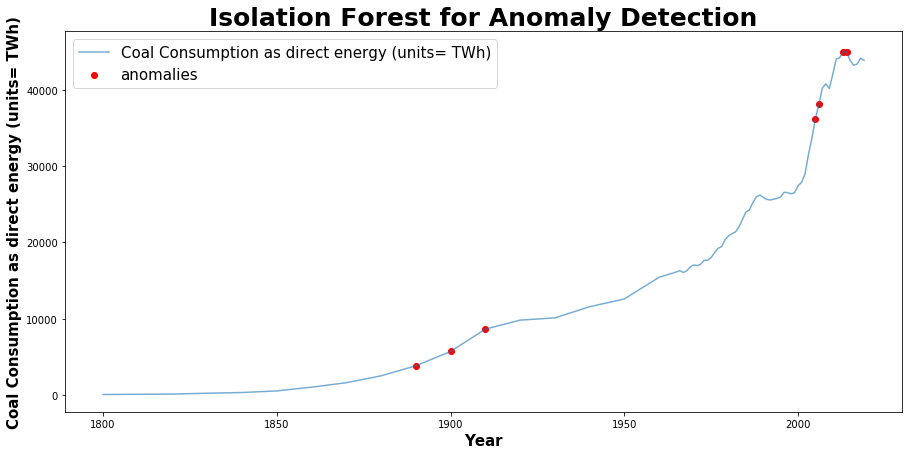

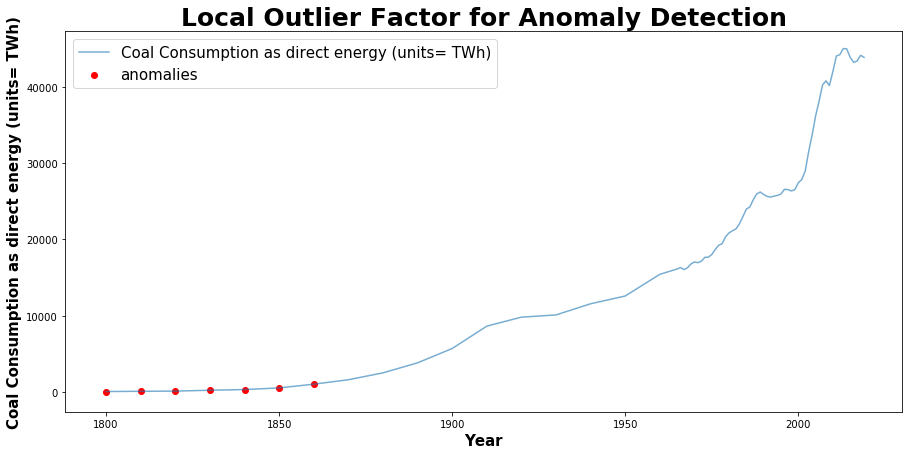

In [64]:
isoForest(data=fossilfuels,contamination=0.09, timeattribute='Year', attribute='Coal (TWh; direct energy)',name= 'Coal Consumption as direct energy (units= TWh)')
lof_model(data=fossilfuels,contamination=0.09, timeattribute='Year', attribute='Coal (TWh; direct energy)',name= 'Coal Consumption as direct energy (units= TWh)')


## Let us check anomalies for Oil as direct energy consumption data

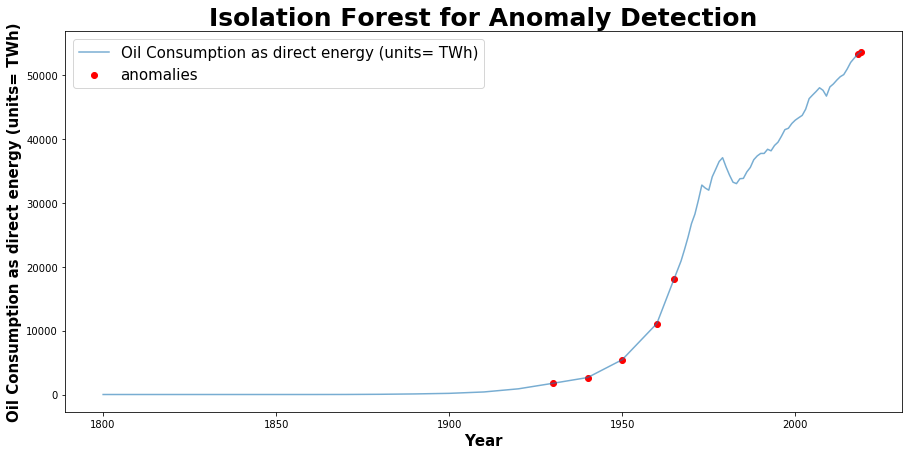

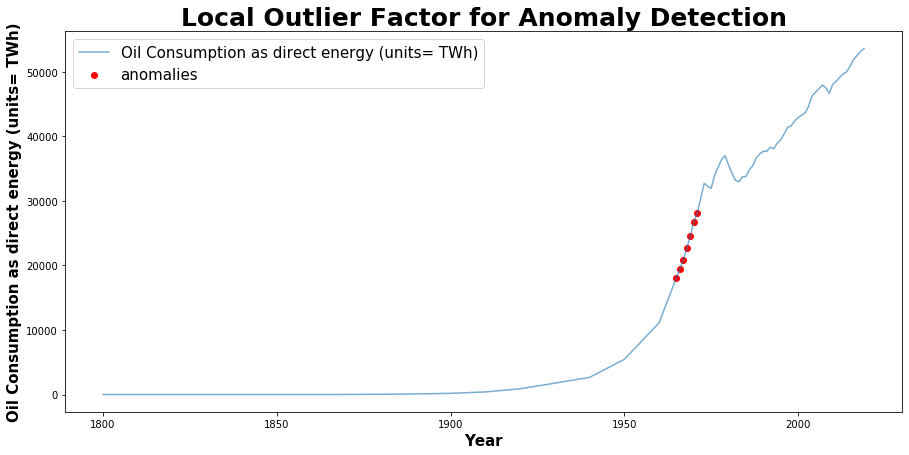

In [65]:
isoForest(data=fossilfuels,contamination=0.09, timeattribute='Year', attribute='Oil (TWh; direct energy)',name= 'Oil Consumption as direct energy (units= TWh)')
lof_model(data=fossilfuels,contamination=0.09, timeattribute='Year', attribute='Oil (TWh; direct energy)',name= 'Oil Consumption as direct energy (units= TWh)')

## Let us check anomalies for Gas as direct energy consumption data

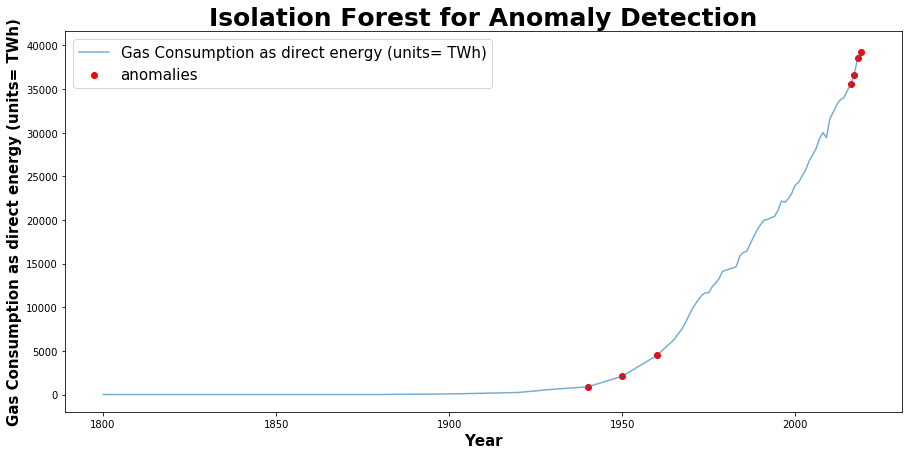

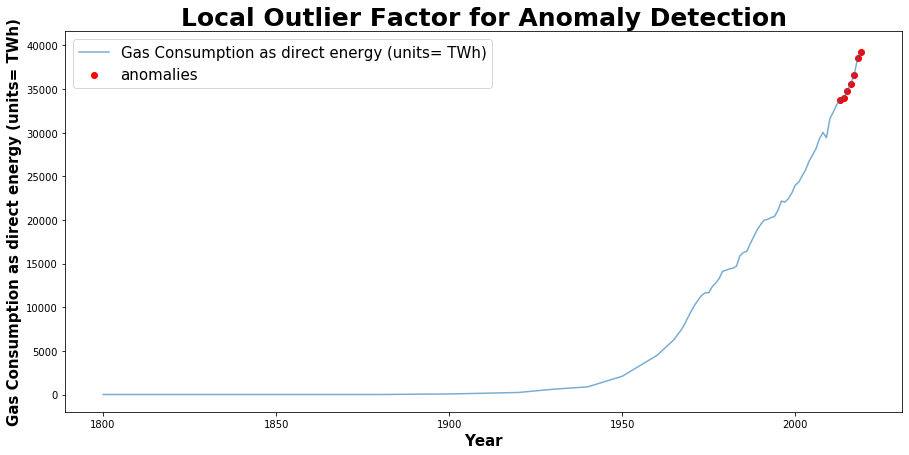

In [66]:
isoForest(data=fossilfuels,contamination=0.09, timeattribute='Year', attribute='Gas (TWh; direct energy)',name= 'Gas Consumption as direct energy (units= TWh)')
lof_model(data=fossilfuels,contamination=0.09, timeattribute='Year', attribute='Gas (TWh; direct energy)',name= 'Gas Consumption as direct energy (units= TWh)')

## To understand why there is a drastic change all of a sudden in recent past we would have to look at Global population data

In [67]:
population=pd.read_csv("https://raw.githubusercontent.com/Manudeep-git/731_Final_Project/main/world/data/Population/worldpopulation_csv.csv")
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Year              81 non-null     int64
 1   World Population  81 non-null     int64
dtypes: int64(2)
memory usage: 1.4 KB


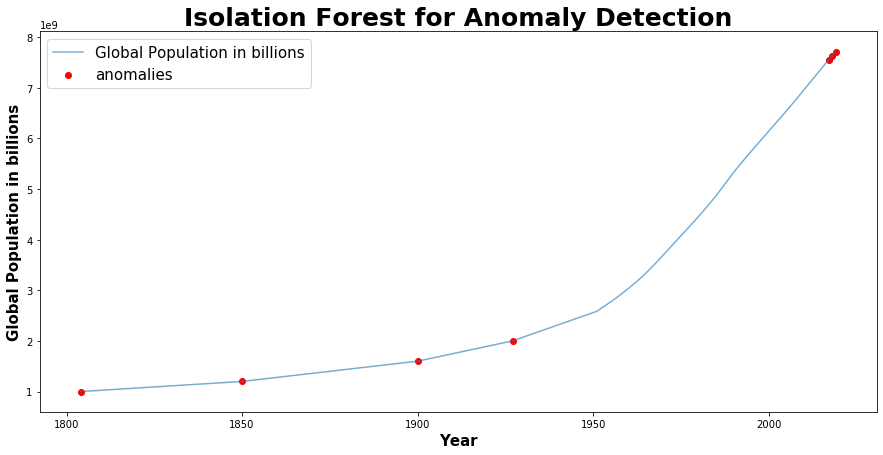

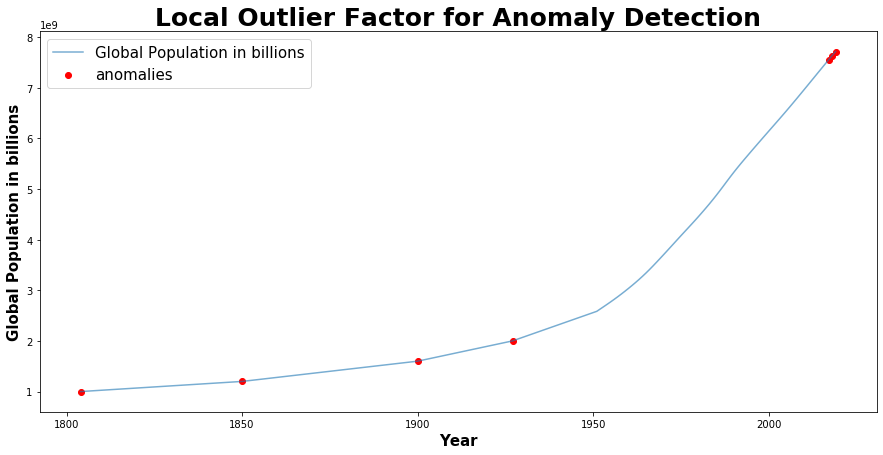

In [68]:
isoForest(data=population[population.Year>=1800],contamination=0.09, timeattribute='Year', attribute='World Population',name= 'Global Population in billions')
lof_model(data=population[population.Year>=1800],contamination=0.09, timeattribute='Year', attribute='World Population',name= 'Global Population in billions')


## Let us import the sea level data and check for anomalies

In [69]:
sealevel=pd.read_csv("https://raw.githubusercontent.com/Manudeep-git/731_Final_Project/main/world/data/Sea_Level/sea-level-rise_zip/archive/epa-sea-level.csv")
sealevel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      135 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
 2   Lower Error Bound         134 non-null    float64
 3   Upper Error Bound         134 non-null    float64
 4   NOAA Adjusted Sea Level   22 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 5.4 KB


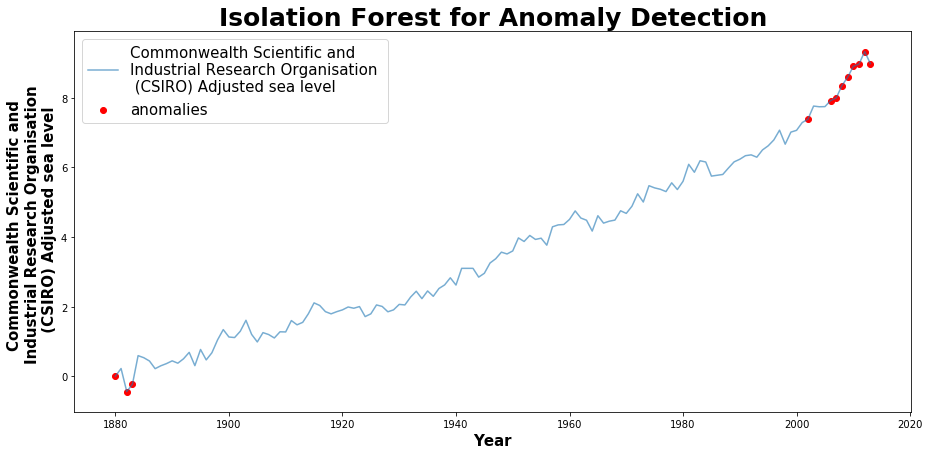

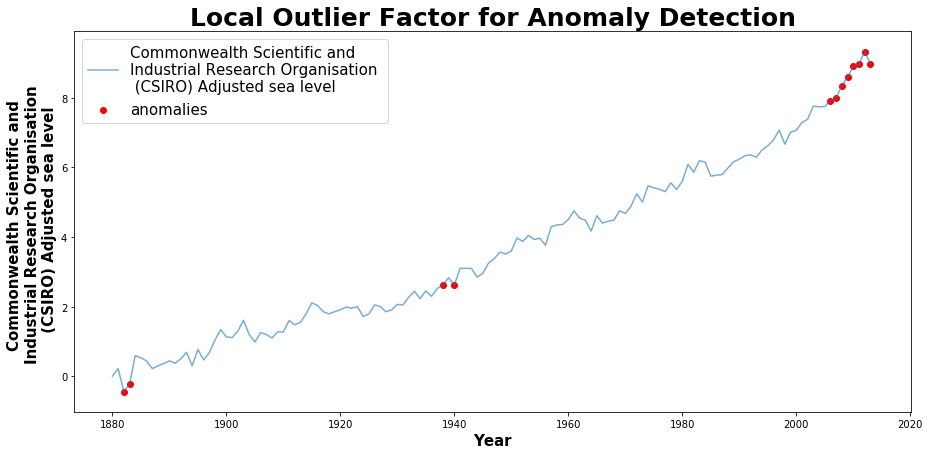

In [70]:
isoForest(data=sealevel[['Year','CSIRO Adjusted Sea Level']].dropna(),contamination=0.09, timeattribute='Year', attribute='CSIRO Adjusted Sea Level',name= 'Commonwealth Scientific and \nIndustrial Research Organisation \n (CSIRO) Adjusted sea level')
lof_model(data=sealevel[['Year','CSIRO Adjusted Sea Level']].dropna(),contamination=0.09, timeattribute='Year', attribute='CSIRO Adjusted Sea Level',name= 'Commonwealth Scientific and \nIndustrial Research Organisation \n (CSIRO) Adjusted sea level')


## Let us import co2 emissions country wise data and check for the four countries

In [71]:
countrybasedco2=pd.read_csv("https://raw.githubusercontent.com/Manudeep-git/731_Final_Project/main/world/data/co2-emissions/annual-co-emissions-per-country.csv")
countrybasedco2.head()

Entity Code  Year  \
0  Afghanistan  AFG  1751   
1  Afghanistan  AFG  1752   
2  Afghanistan  AFG  1753   
3  Afghanistan  AFG  1754   
4  Afghanistan  AFG  1755   

   Annual CO₂ emissions (Global Carbon Project (2017)) (million tonnes)  
0                                                0.0                     
1                                                0.0                     
2                                                0.0                     
3                                                0.0                     
4                                                0.0

## Let us first check for USA

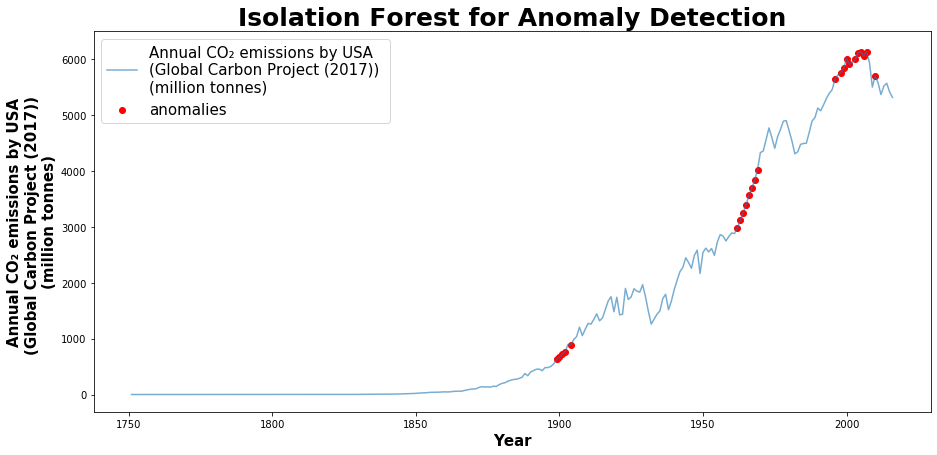

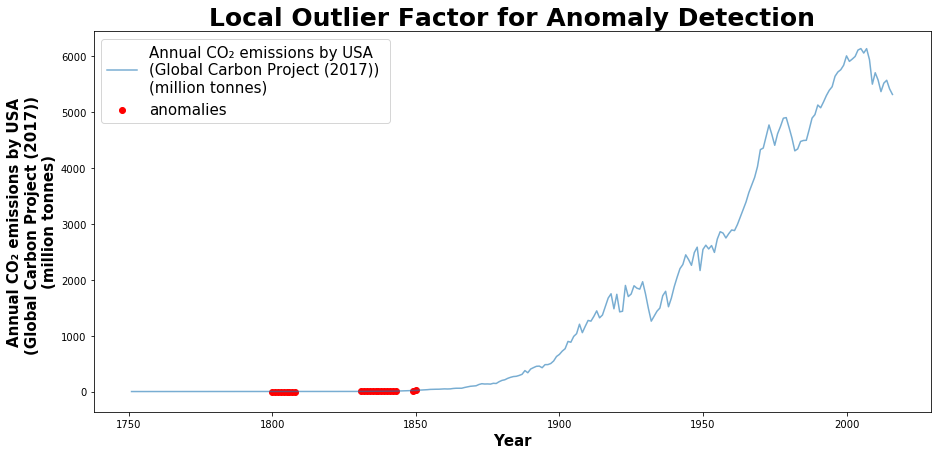

In [72]:
isoForest(data=countrybasedco2[countrybasedco2.Code=='USA'].dropna(),contamination=0.09, timeattribute='Year', attribute='Annual CO₂ emissions (Global Carbon Project (2017)) (million tonnes)',name= 'Annual CO₂ emissions by USA\n(Global Carbon Project (2017)) \n(million tonnes)')
lof_model(data=countrybasedco2[countrybasedco2.Code=='USA'].dropna(),contamination=0.09, timeattribute='Year', attribute='Annual CO₂ emissions (Global Carbon Project (2017)) (million tonnes)',name= 'Annual CO₂ emissions by USA\n(Global Carbon Project (2017)) \n(million tonnes)')

## Let us now check for Russia

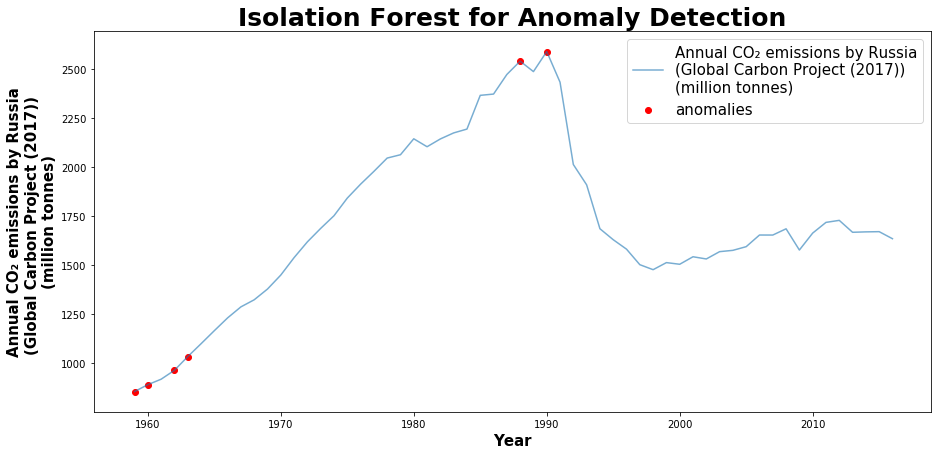

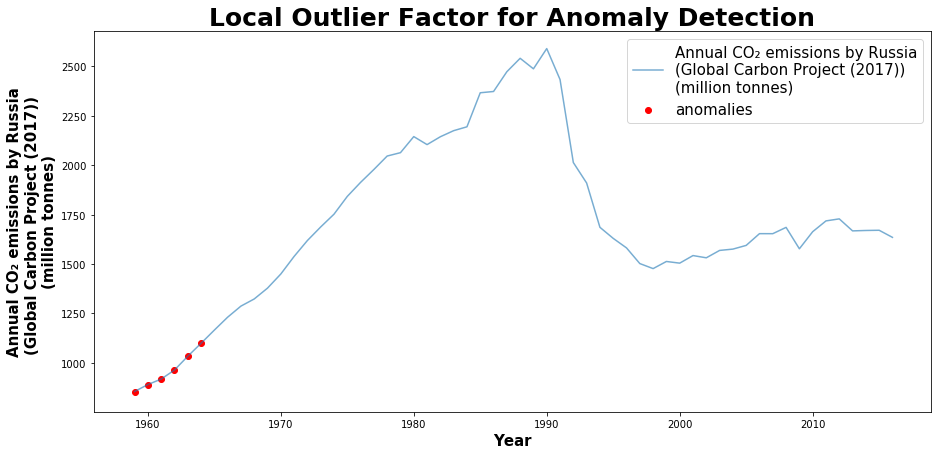

In [73]:
isoForest(data=countrybasedco2[countrybasedco2.Code=='RUS'].dropna(),contamination=0.09, timeattribute='Year', attribute='Annual CO₂ emissions (Global Carbon Project (2017)) (million tonnes)',name= 'Annual CO₂ emissions by Russia\n(Global Carbon Project (2017)) \n(million tonnes)')
lof_model(data=countrybasedco2[countrybasedco2.Code=='RUS'].dropna(),contamination=0.09, timeattribute='Year', attribute='Annual CO₂ emissions (Global Carbon Project (2017)) (million tonnes)',name= 'Annual CO₂ emissions by Russia\n(Global Carbon Project (2017)) \n(million tonnes)')

## Let us now check for UK

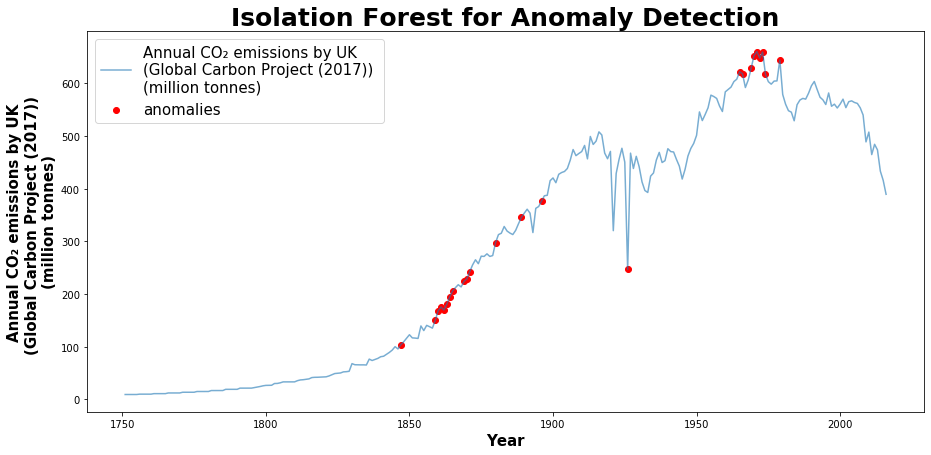

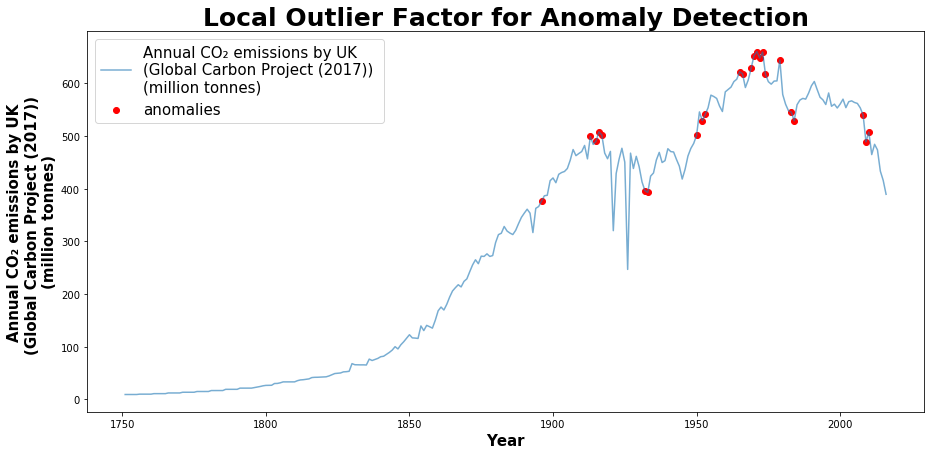

In [74]:
isoForest(data=countrybasedco2[countrybasedco2.Code=='GBR'].dropna(),contamination=0.09, timeattribute='Year', attribute='Annual CO₂ emissions (Global Carbon Project (2017)) (million tonnes)',name= 'Annual CO₂ emissions by UK\n(Global Carbon Project (2017)) \n(million tonnes)')
lof_model(data=countrybasedco2[countrybasedco2.Code=='GBR'].dropna(),contamination=0.09, timeattribute='Year', attribute='Annual CO₂ emissions (Global Carbon Project (2017)) (million tonnes)',name= 'Annual CO₂ emissions by UK\n(Global Carbon Project (2017)) \n(million tonnes)')

## Let us now check for Australia

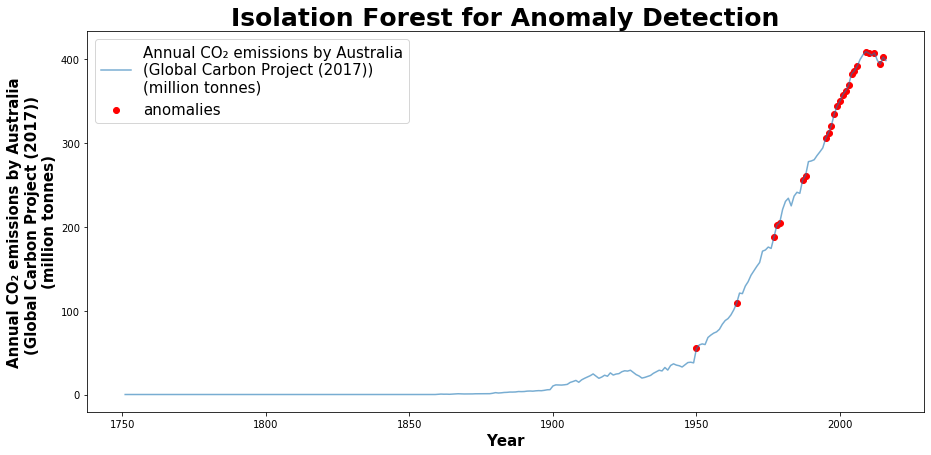

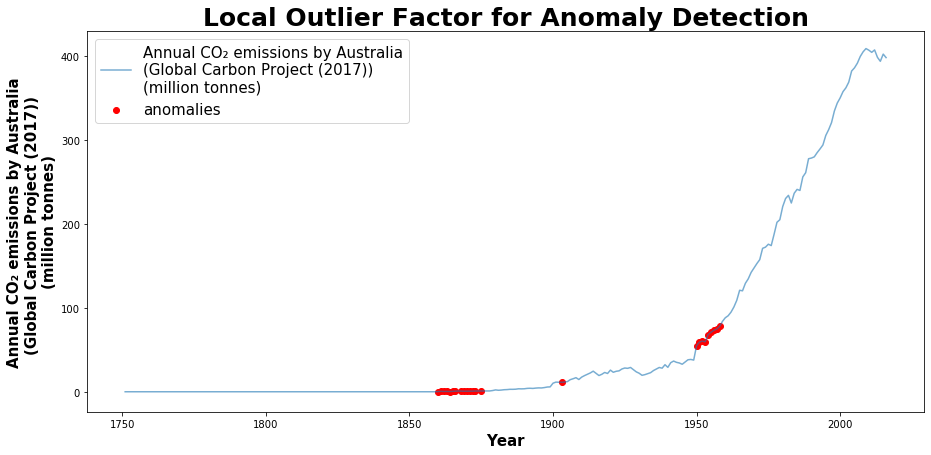

In [75]:
isoForest(data=countrybasedco2[countrybasedco2.Code=='AUS'].dropna(),contamination=0.09, timeattribute='Year', attribute='Annual CO₂ emissions (Global Carbon Project (2017)) (million tonnes)',name= 'Annual CO₂ emissions by Australia\n(Global Carbon Project (2017)) \n(million tonnes)')
lof_model(data=countrybasedco2[countrybasedco2.Code=='AUS'].dropna(),contamination=0.09, timeattribute='Year', attribute='Annual CO₂ emissions (Global Carbon Project (2017)) (million tonnes)',name= 'Annual CO₂ emissions by Australia\n(Global Carbon Project (2017)) \n(million tonnes)')

## Let us import USA drought data and check for anomalies

In [76]:
drought=pd.read_csv("https://www.epa.gov/sites/production/files/2016-08/drought_fig-1.csv",header=6)
drought.head()

Year  Annual avg  9-yr avg
0  1895   -0.118333 -0.072910
1  1896    0.222500 -0.069574
2  1897   -0.452500 -0.073688
3  1898    0.101667 -0.090869
4  1899    0.020000 -0.170443

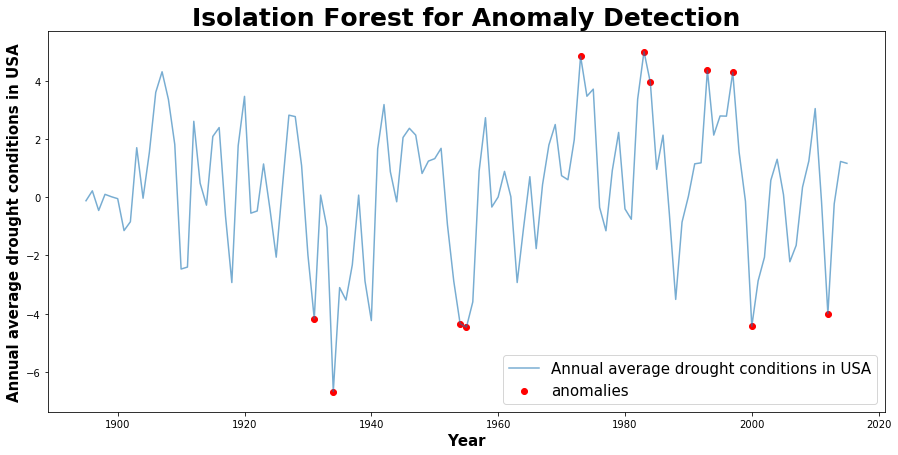

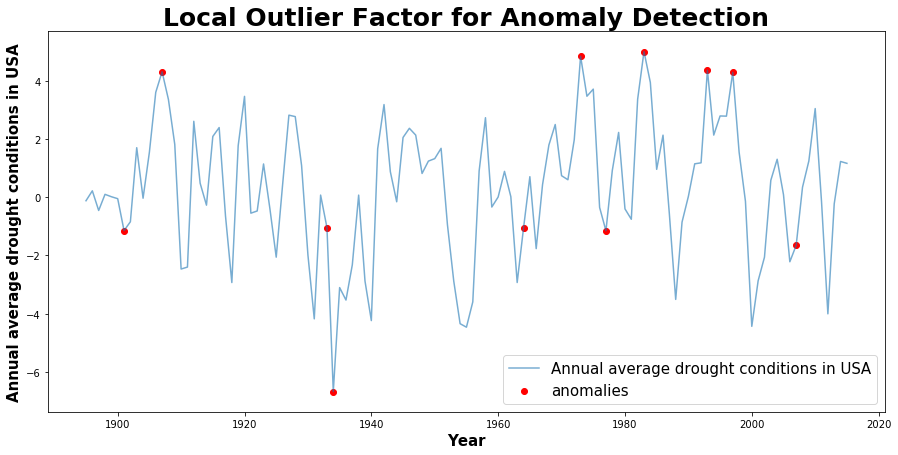

In [77]:
isoForest(data=drought,contamination=0.09, timeattribute='Year', attribute='Annual avg',name= 'Annual average drought conditions in USA')
lof_model(data=drought,contamination=0.09, timeattribute='Year', attribute='Annual avg',name= 'Annual average drought conditions in USA')


# Conclusion and Future Enhancements:
    
- We can clearly see that Isolation Forest has performed way better than Local Outlier Factor in almost all scenarios
- We have seen all the effects and causes of Climate change and also seen the anomalies for every feature.
---
- In future, we can also work on Ice sheets data and also use some more models other than these two, maily I'm interested to try out Neural Networks and check how would they detect outliers.
- To talk about Climate change, if each and every one of us do not try to take action against climate change our earth might head to an irreversible change.